In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from matplotlib.patches import Polygon
import os
import random

In [2]:
dataDir='../..'

train_data='train2017'
train_ann='{}/annotations/instances_{}.json'.format(dataDir, train_data)
val_data='val2017'
val_ann='{}/annotations/instances_{}.json'.format(dataDir,val_data)

In [3]:
# initialize COCO api for instance annotations
# coco=COCO(train_ann)
coco = COCO(train_ann)

loading annotations into memory...
Done (t=12.04s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

super_cats = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(super_cats)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor vehicle appliance furniture animal electronic indoor food person accessory kitchen sports


In [13]:
category = ['person']
print(type(category[0]))
print(len(nms))

<class 'str'>
80


In [14]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=category)
imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))

64115


[262145]
[262146]
[524291]
[262148]
[393223]
[393224]
[524297]
[393227]
[131084]
[393230]
[262161]
[131089]


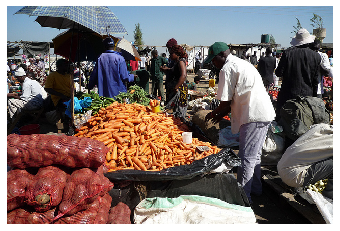

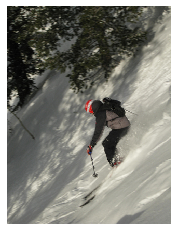

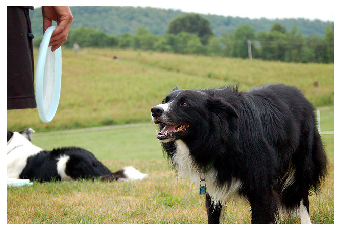

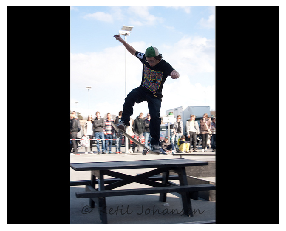

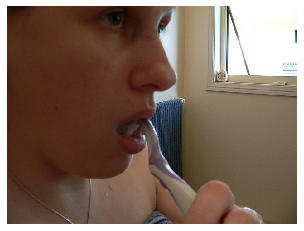

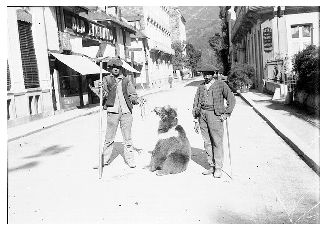

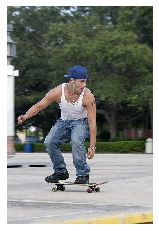

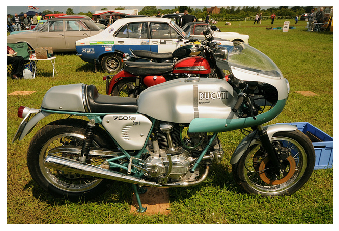

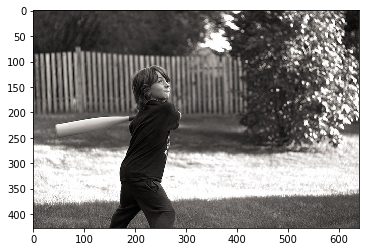

In [21]:
for i in range(12):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
    print(imgId)
#     print(img)
    
    I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.figure(i+1)
    plt.imshow(I)
    
plt.show()

[262145]
[262146]
[524291]
[262148]
[393223]
[393224]
[524297]
[393227]
[131084]
[393230]
[262161]
[131089]
[524311]
[393241]
[524314]


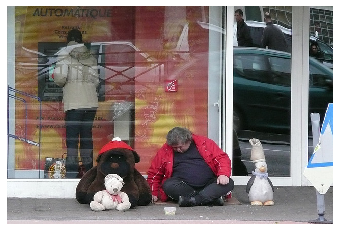

In [23]:
for i in range(15):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
    print(imgId)
#     print(img)
    
    I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
#     I = io.imread(img['coco_url'])
#     plt.figure(i+1)
    plt.imshow(I); plt.axis('off')
#     annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#     anns = coco.loadAnns(annIds)
#     conts = coco.showAnns(anns)

In [17]:
# print(conts)
# wht_image = cv2.bitwise_not(np.zeros(I.shape, np.uint8))
# I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
# I = io.imread(img['coco_url'])
plt.figure(i+1)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
conts = coco.showAnns(anns)

print(len(conts))

conts = np.asarray(conts)
# print(type(conts))
# print(conts.ndim)
# print(conts.shape)

cont = []

for i in range(conts.shape[0]):
    cn = conts[i]
#     cn = cn.astype(int)
#     print(cn.shape)
#     print(cn)
    cn = np.asarray(cn)
#     print(cn)
    cn = np.reshape(cn, (cn.shape[0], 1, cn.shape[1]))
    cn = cn.astype(int)
    print(cn.shape)
    cont+=[cn]
#     break

cont = sorted(cont, key = cv2.contourArea, reverse=True)
# for i in range(3):
#     print(cv2.contourArea(cont[i]))

c1 = cont[0]
# print(c1)

c1 = np.asarray(c1)
# print(c1.shape)
c1 = np.reshape(c1, (c1.shape[0], c1.shape[2]))
# print(c1)
# print(c1.shape)
# cont = np.asarray(cont)
# print(cont.shape)
if conts.shape[0]==1:
    cnt=conts
else:
    
    conts = np.reshape(conts, (conts.shape[0],1))
#     print(conts.shape)
    cnt = conts[0]
# print(conts)
# print(cnt.shape)
# print(cnt)
# print(type(cnt))
# print(cnt[0].shape)
# print(cnt[0])

# cnt = np.asarray(cnt)
# cntt = np.reshape(cnt[0], (cnt[0].shape[0], 1, cnt[0].shape[1]))
# print(cntt)
# cntt = cntt.astype(int)
# print(type(cntt))
# print(cntt.shape)
# print(cv2.contourArea(cntt))
# print(cntt[0][0])
# print(cnt)
# print(cnt)

# m = int(cnt)
# print(I[m])

# cv2.drawContours(I, np.int32([cnt[0]]), -1, (0,0,0), -1)

# plt.axis('off')
# plt.imshow(I)
# plt.show()
# io.imsave('forged_image.png', I)

2
(30, 1, 2)
(34, 1, 2)


274 237 176 162
(428, 640, 3)
[[  8 150]
 [ 25 145]
 [ 42 146]
 [ 59 152]
 [ 63 158]
 [ 91 158]
 [117 161]
 [129 161]
 [140 161]
 [149 158]
 [159 141]
 [166 135]
 [171 129]
 [172 121]
 [175 105]
 [175  99]
 [172  88]
 [163  55]
 [125  27]
 [106  20]
 [ 81   8]
 [ 54   0]
 [ 48   3]
 [ 45  11]
 [ 38  25]
 [ 35  32]
 [ 19  46]
 [  5  90]
 [  0 112]
 [  9 138]]
[[  8 150]
 [ 25 145]
 [ 42 146]
 [ 59 152]
 [ 63 158]
 [ 91 158]
 [117 161]
 [129 161]
 [140 161]
 [149 158]
 [159 141]
 [166 135]
 [171 129]
 [172 121]
 [175 105]
 [175  99]
 [172  88]
 [163  55]
 [125  27]
 [106  20]
 [ 81   8]
 [ 54   0]
 [ 48   3]
 [ 45  11]
 [ 38  25]
 [ 35  32]
 [ 19  46]
 [  5  90]
 [  0 112]
 [  9 138]]
(162, 176, 3)


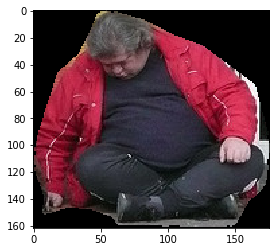

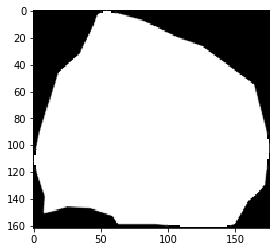

In [18]:
pts = c1
pts = pts.astype(int)
# print(pts)
# print(c1)
# print(pts)

## (1) Crop the bounding rect
rect = cv2.boundingRect(pts)
x,y,w,h = rect
print(x,y,w,h)
print(I.shape)

roi = I[0:h, 0:w]
croped = I[y:y+h, x:x+w].copy()
croped_2 = I.copy()



## (2) make mask
pts = pts - pts.min(axis=0)

c1 = c1 - c1.min(axis=0)
print(pts)
print(c1)
mask = np.zeros(croped.shape[:2], np.uint8)
mask_inv = cv2.bitwise_not(mask)
mask_2 = np.zeros(croped_2.shape[:2], np.uint8)
src_mask = np.zeros(croped.shape, croped.dtype)

cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
cv2.fillPoly(src_mask, [pts], (255, 255, 255))
cv2.drawContours(mask_2, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)


## (3) do bit-op
dst = cv2.bitwise_and(croped, croped, mask=mask)
# dst_2 = cv2.bitwise_and(croped_2, croped_2, mask=mask_2)

# img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
# img2_fg = cv2.bitwise_and(croped, croped, mask=mask_inv)
# dst_1 = cv2.bitwise_and(I, I, mask=src_mask)
# dst_f = cv2.add(img1_bg, img2_fg)

# dst_w = cv2.addWeighted(img1_bg, 0.2, img2_fg, 0.8, 0)

# I3 = I.copy()
# I3[0:h, 0:w] = dst_f


## (4) add the white background
bg = np.ones_like(croped, np.uint8)*255
print(bg.shape)
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst

# bg_2 = np.ones_like(I, np.uint8)*255
# print(bg_2.shape)
# cv2.bitwise_not(bg_2, bg_2, mask=mask)
# dst3 = bg_2 + dst
# io.imsave("dst3.png", dst3)

# io.imsave("croped.png", croped)
# io.imsave("mask.png", mask)
# io.imsave("dst.png", dst)
# io.imsave("dst2.png", dst2)
# io.imsave("bg.png", img1_bg)
io.imsave("full_mask.png", mask_2)
plt.figure()
plt.imshow(dst)
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray)
# plt.figure()
# plt.imshow(img1_bg)
# plt.figure()
# plt.imshow(img2_fg)
# plt.figure()
# plt.imshow(I3)

(97, 105, 3)
(97, 105, 3)


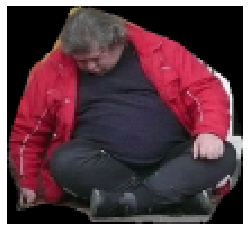

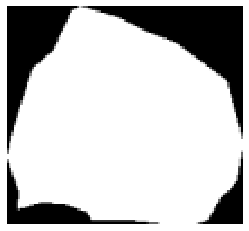

In [25]:
from skimage.transform import resize

# dst_resized = resize(dst, (dst.shape[0]//2, dst.shape[1]//2), anti_aliasing=True )
# print(dst_resized.max())
# dst_resized=  dst_resized*255
# print(dst_resized.max())
# dst2_resized = resize(dst2, (dst2.shape[0]//2, dst2.shape[1]//2), anti_aliasing=True)
# print(dst_resized.shape)
# plt.figure()
# plt.imshow(dst_resized)


scale_percent = 60 # percent of original size
width = int(croped.shape[1] * scale_percent / 100)
height = int(croped.shape[0] * scale_percent / 100)
dim = (width, height)

croped_resized = cv2.resize(croped, dim, interpolation = cv2.INTER_AREA)
dst_resized = cv2.resize(dst, dim, interpolation = cv2.INTER_AREA)
src_mask_resized = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)

plt.figure()
plt.axis('off')
plt.imshow(dst_resized)
print(dst_resized.shape)
plt.figure()
plt.axis('off')
plt.imshow(src_mask_resized)
print(src_mask_resized.shape)

In [20]:
# print(cnt[0])
# adds = cv2.add(I, dst_resized)
# plt.imshow(adds)
# mask_resized = resize(mask, (mask.shape[0]//2, mask.shape[1]//2), anti_aliasing=True)
# croped_resized = resize(croped, (croped.shape[0]//2, croped.shape[1]//2), anti_aliasing=True)
x_offset=y_offset=50
# I[y_offset:y_offset+(croped_resized.shape[0]), x_offset:x_offset+ (croped_resized.shape[1])] = croped_resized
I2 = I.copy()
I2[I2.shape[0] - (croped_resized.shape[0]) - 10:I2.shape[0] - 10, 25:25 + (croped_resized.shape[1])] = croped_resized
# plt.imshow(cv2.cvtColor(I2, cv2.COLOR_BGR2RGB))
plt.imshow(I2)
# io.imsave("cmfd_image.png", I2)
plt.figure()
plt.imshow(I)

In [233]:
# center1 = (150, 150)
# output_normal = cv2.seamlessClone(croped_resized, I, src_mask_resized, center1, cv2.NORMAL_CLONE)

# center2 = (400, 150)
# output_mixed = cv2.seamlessClone(dst_resized, I, src_mask_resized, center2, cv2.MIXED_CLONE)

# plt.figure()
# plt.imshow(output_normal)

# plt.figure()
# plt.imshow(output_mixed)

# io.imsave('normal_clone.png', output_normal)
# io.imsave('mixed_clone.png', output_mixed)




iii = []
for k in new_list:
    print(k)
    c = coco.getCatIds(catNms=k)
    iIds = coco.getImgIds(catIds=c)
    print(len(iIds))
    iii +=[len(iIds)]
print(sorted(iii))




#     for i in range(1):
#         imgId = coco.getImgIds(imgIds=iIds[i])
#     #     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#         img = coco.loadImgs(iIds[i])[0]
#         print(imgId)
#         print(img)

#         I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
#     #     I = io.imread(img['coco_url'])
#         plt.axis('off')
#         plt.figure(i+1)
#         plt.imshow(I)
#         annIds = coco.getAnnIds(imgIds=img['id'], catIds=c, iscrowd=None)
#         anns = coco.loadAnns(annIds)
#         conts = coco.showAnns(anns)
    
#     plt.show()

# g = nms.index("hot dog")
# print(g)
# new_list = nms.copy()
# new_list.pop(g)
# print(new_list.index("hot dog"))
# g = new_list.index("toaster")
# print(g)
# new_list.pop(g)
print((new_list))
print(iii)

person
64115
bicycle
3252
car
12251
motorcycle
3502
airplane
2986
bus
3952
train
3588
truck
6127
boat
3025
traffic light
4139
fire hydrant
1711
stop sign
1734
parking meter
705
bench
5570
bird
3237
cat
4114
dog
4385
horse
2941
sheep
1529
cow
1968
elephant
2143
bear
960
zebra
1916
giraffe
2546
backpack
5528
umbrella
3968
handbag
6841
tie
3810
suitcase
2402
frisbee
2184
skis
3082
snowboard
1654
sports ball
4262
kite
2261
baseball bat
2506
baseball glove
2629
skateboard
3476
surfboard
3486
tennis racket
3394
bottle
8501
wine glass
2533
cup
9189
fork
3555
knife
4326
spoon
3529
bowl
7111
banana
2243
apple
1586
sandwich
2365
orange
1699
broccoli
1939
pizza
3166
donut
1523
cake
2925
chair
12774
couch
4423
potted plant
4452
bed
3682
dining table
11837
toilet
3353
tv
4561
laptop
3524
mouse
1876
remote
3076
keyboard
2115
cell phone
4803
microwave
1547
oven
2877
sink
4678
refrigerator
2360
book
5332
clock
4659
vase
3593
scissors
947
toothbrush
1007
[705, 947, 960, 1007, 1523, 1529, 1547, 1586, 16

In [303]:
from os import listdir

remove_imgs = '../../coco_corrupted_images/'
r = listdir(remove_imgs)
print(len(r))
b =0
# for i in r:
# #     print(i)
#     k = i.split('.')[0]
# #     print(k, int(k))
#     print(b)
#     imgIds.remove(int(k))
#     b+=1
# imgIds.remove(398858)
# imgIds.remove(533408)
# imgIds.remove(405740)
# print(len(imgIds))
# print(len(new_list))
gg = new_list.index('microwave')
print(gg)
nn = new_list[gg:]
for k in nn:
    print(k)
#     k = ['motorcycle']
    categories = coco.getCatIds(catNms=k)
    imgIds = coco.getImgIds(catIds=categories)
    print(len(imgIds))
    for p in r:
        l = p.split('.')[0]
        l = int(l)
    #         print(l, int(l))
        if l in imgIds:
            imgIds.remove(l)
    print(len(imgIds))
    for i in range(705):
        imgId = coco.getImgIds(imgIds=imgIds[i])
    #     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
        img = coco.loadImgs(imgIds[i])[0]
    #     print(imgId)
    #     print(img)
#         print(img['file_name'])
        I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
    
#     break

57
66
microwave
1547
1546
oven
2877
2876
sink
4678
4675
refrigerator
2360
2360
book
5332
5328
clock
4659
4656
vase
3593
3592
scissors
947
946
toothbrush
1007
1006


In [302]:
remove_imgs = '../../coco_corrupted_images/'
r = listdir(remove_imgs)
k = ['microwave']
categories = coco.getCatIds(catNms=k)
imgIds = coco.getImgIds(catIds=categories)
print(len(imgIds))
for p in r:
    l = p.split('.')[0]
    l = int(l)
#         print(l, int(l))
    if l in imgIds:
        imgIds.remove(l)
print(len(imgIds))
for i in range(705):
    imgId = coco.getImgIds(imgIds=imgIds[i])
#     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    img = coco.loadImgs(imgIds[i])[0]
#     print(imgId)
#     print(img)
    print(img['file_name'])
    I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))

1547
1546
000000172040.jpg
000000090122.jpg
000000458778.jpg
000000426022.jpg
000000253992.jpg
000000458804.jpg
000000507958.jpg
000000409658.jpg
000000294978.jpg
000000254025.jpg
000000122964.jpg
000000327768.jpg
000000000089.jpg
000000213091.jpg
000000008292.jpg
000000508006.jpg
000000483432.jpg
000000245874.jpg
000000303218.jpg
000000516212.jpg
000000188544.jpg
000000319616.jpg
000000073861.jpg
000000295053.jpg
000000352398.jpg
000000491664.jpg
000000286876.jpg
000000057503.jpg
000000049312.jpg
000000000164.jpg
000000032932.jpg
000000557227.jpg
000000196789.jpg
000000524471.jpg
000000540858.jpg
000000204987.jpg
000000393418.jpg
000000082122.jpg
000000368844.jpg
000000303308.jpg
000000278732.jpg
000000467177.jpg
000000221427.jpg
000000065781.jpg
000000024823.jpg
000000205054.jpg
000000409855.jpg
000000106772.jpg
000000164121.jpg
000000557339.jpg
000000229666.jpg
000000393508.jpg
000000000294.jpg
000000213288.jpg
000000147778.jpg
000000246089.jpg
000000057673.jpg
000000500044.jpg
0000

000000297414.jpg
000000518601.jpg
000000190927.jpg
000000518610.jpg
000000059868.jpg
000000231905.jpg
000000174567.jpg
000000272882.jpg
000000354804.jpg
000000551427.jpg
000000354821.jpg
000000027146.jpg
000000461331.jpg
000000559639.jpg
000000576030.jpg
000000199203.jpg
000000141860.jpg
000000420389.jpg
000000305702.jpg
000000453159.jpg
000000469558.jpg
000000256589.jpg
000000346702.jpg
000000510552.jpg
000000387678.jpg
000000313951.jpg
000000100975.jpg
000000068212.jpg
000000461430.jpg
000000404095.jpg
000000395904.jpg
000000346754.jpg
000000486018.jpg
000000494217.jpg
000000010909.jpg
000000109216.jpg
000000346788.jpg
000000068260.jpg
000000297639.jpg
000000494248.jpg
000000363190.jpg
000000019131.jpg
000000084680.jpg
000000150225.jpg
000000543447.jpg
000000256731.jpg
000000486122.jpg
000000436975.jpg
000000199422.jpg
000000174868.jpg
000000322325.jpg
000000469786.jpg
000000158497.jpg
000000469793.jpg
000000551713.jpg
000000346915.jpg
000000101157.jpg
000000174887.jpg
000000568113.j

In [304]:
# for _ in 
if not os.path.exists('./cmf/authentic'):
    os.makedirs('./cmf/authentic')
if not os.path.exists('./cmf/tamper'):
    os.makedirs('./cmf/tamper')

remove_imgs = '../../coco_corrupted_images/'
r = listdir(remove_imgs)
    
    
for k in new_list:
    print(k)
    categories = coco.getCatIds(catNms=k)
    iIds = coco.getImgIds(catIds=categories)
    for p in r:
        l = p.split('.')[0]
        l = int(l)
    #         print(l, int(l))
        if l in iIds:
            iIds.remove(l)
    print(len(iIds))
    for i in range(705):
        imgId = coco.getImgIds(imgIds=iIds[i])
    #     img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
        img = coco.loadImgs(iIds[i])[0]
    #     print(imgId)
    #     print(img)

        I = io.imread('%s/%s/%s'%(dataDir,train_data,img['file_name']))
#         I = io.imread(img['coco_url'])
    #     I_resize = cv2.resize(I, (384, 256))
        I2 = I.copy()
        annIds = coco.getAnnIds(imgIds=img['id'], catIds=categories, iscrowd=None)
        anns = coco.loadAnns(annIds)
        conts = coco.showAnns(anns)
        conts = np.asarray(conts)
        # print(conts)
    #     print(conts.ndim)
    #     print(conts.shape)
        cont = []
    #     print(conts.shape)
        for j in range(conts.shape[0]):
            cn = conts[j]
        #     cn = cn.astype(int)
        #     print(cn.shape)
        #     print(cn)
            cn = np.asarray(cn)
        #     print(cn)
            cn = np.reshape(cn, (cn.shape[0], 1, cn.shape[1]))
            cn = cn.astype(int)
    #         print(cn.shape)
            cont+=[cn]
        #     break

        cont = sorted(cont, key = cv2.contourArea, reverse=True)

    #     if conts.shape[0]==1:
    #         cnt=conts
    #     else:

    #         conts = np.reshape(conts, (conts.shape[0],1))
    # #         print(conts.shape)
    #         cnt = conts[0]
    # #     print(cnt.shape)
    #     # print(cnt[0])
    # #     print(cnt[0].shape)
    #     cnt = np.asarray(cnt)
        c1 = cont[0]
        print(cv2.contourArea(c1))
        if cv2.contourArea(c1)>=4000:
            c1 = np.asarray(c1)
            # print(c1.shape)
            c1 = np.reshape(c1, (c1.shape[0], c1.shape[2]))
            pts = c1
            pts = pts.astype(int)

            # print(pts)

            ## (1) Crop the bounding rect
            rect = cv2.boundingRect(pts)
            x,y,w,h = rect
            print("area:" ,np.multiply(w,h))
        #     print(x,y,w,h)
        #     print(I.shape)

            roi = I[0:h, 0:w]
            croped = I[y:y+h, x:x+w].copy()
        #     croped_2 = I.copy()


            ## (2) make mask
            pts = pts - pts.min(axis=0)


            mask = np.zeros(croped.shape[:2], np.uint8)
            mask_inv = cv2.bitwise_not(mask)
        #     mask_2 = np.zeros(croped_2.shape[:2], np.uint8)
        #     src_mask = np.zeros(croped.shape, croped.dtype)

            cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
        #     cv2.fillPoly(src_mask, [pts], (255, 255, 255))
        #     cv2.drawContours(mask_2, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)


            ## (3) do bit-op
            dst = cv2.bitwise_and(croped, croped, mask=mask)
            # dst_2 = cv2.bitwise_and(croped_2, croped_2, mask=mask_2)

        #     img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
        #     img2_fg = cv2.bitwise_and(croped, croped, mask=mask_inv)
            # dst_1 = cv2.bitwise_and(I, I, mask=src_mask)
        #     dst_f = cv2.add(img1_bg, img2_fg)

        #     dst_w = cv2.addWeighted(img1_bg, 0.2, img2_fg, 0.8, 0)

        #     I3 = I.copy()
        #     I3[0:h, 0:w] = dst_f


            ## (4) add the white background
            bg = np.ones_like(croped, np.uint8)*255
            cv2.bitwise_not(bg,bg, mask=mask)
            dst2 = bg+ dst

            scale_percent = 60 # percent of original size
            width = int(croped.shape[1] * scale_percent / 100)
            height = int(croped.shape[0] * scale_percent / 100)
            dim = (width, height)

            croped_resized = cv2.resize(croped, dim, interpolation = cv2.INTER_AREA)
        #     dst_resized = cv2.resize(dst, dim, interpolation = cv2.INTER_AREA)
        #     src_mask_resized = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)


#             y_offset=50 + random.randint(10, 100)
            
            # I[y_offset:y_offset+(croped_resized.shape[0]), x_offset:x_offset+ (croped_resized.shape[1])] = croped_resized
            y_offset = random.randint(I2.shape[0]//4, I2.shape[0] - croped_resized.shape[0])
#             y_offset = random.randint(0, I2.shape[0] - croped_resized.shape[0])
            x_offset = random.randint(0, I2.shape[1] - croped_resized.shape[1])
        #     I2[10:10+(croped_resized.shape[0]), 25:25 + (croped_resized.shape[1])] = croped_resized Fixed
#             I2[I2.shape[0] - (croped_resized.shape[0]) - y_offset:I2.shape[0] - y_offset, I2.shape[1] - x_offset - (croped_resized.shape[1]): I2.shape[1] - x_offset] = croped_resized # right
#             I2[I2.shape[0] - (croped_resized.shape[0]) - y_offset:I2.shape[0] - y_offset, x_offset: x_offset + (croped_resized.shape[1])] = croped_resized # left
            I2[y_offset: y_offset + (croped_resized.shape[0]), x_offset: x_offset + (croped_resized.shape[1])] = croped_resized
        # plt.imshow(cv2.cvtColor(I2, cv2.COLOR_BGR2RGB))
        #     plt.figure(i+1)
        #     plt.imshow(I2)


            io.imsave("./cmf/authentic/" + "cmfd_" + k + "_" + str(i) + ".png", I)
            io.imsave("./cmf/tamper/" + "cmfdr_"+ k + "_" + str(i) + ".png", I2)

        #     plt.figure(i+1)
        #     plt.imshow(I); plt.axis('off')
        #     annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
        #     anns = coco.loadAnns(annIds)
        #     conts = coco.showAnns(anns)

person
64084
21258.0
area: 47158
18372.0
area: 30740
10792.0
area: 12505
14282.5
area: 43646
172868.0
area: 272160
190673.0
area: 256700
11731.5
area: 22748
46808.0
area: 91290
14969.0
area: 37920
6575.5
area: 17010
1383.0
26272.0
area: 45617
36630.0
area: 69657
36943.0
area: 93500
20700.5
area: 28512
235971.0
area: 292937
1619.0
74283.5
area: 118477
110222.0
area: 156948
81183.0
area: 152425
73767.0
area: 148764
72991.5
area: 112046
36.0
621.5
86197.5
area: 145704
22001.0
area: 67980
11743.0
area: 21600
2177.0
1743.0
21461.5
area: 46863
22017.0
area: 57876
46024.0
area: 67680
1280.0
11788.0
area: 28363
84700.0
area: 137112
102374.0
area: 211484
927.0
14387.0
area: 25200
8456.0
area: 16637
753.0
86360.5
area: 147798
15579.5
area: 28381
1220.5
8157.0
area: 16268
10042.0
area: 16770
106.5
21720.0
area: 73990
24478.5
area: 49010
218.5
103441.0
area: 158844
71840.0
area: 101528
96245.0
area: 206640
26853.0
area: 49713
1084.0
31346.0
area: 69188
1052.0
224.0
293.0
142963.0
area: 205675
9597

14078.0
area: 26390
78.5
729.5
30409.0
area: 39562
28379.0
area: 78176
192.0
26096.5
area: 48528
217.0
144543.5
area: 184262
44616.0
area: 72940
49696.5
area: 87122
3338.5
12066.5
area: 26772
40709.0
area: 102426
163676.5
area: 165330
402.5
58891.0
area: 87074
3834.0
75104.5
area: 202584
22950.0
area: 85986
5191.0
area: 10560
7937.0
area: 10648
40418.0
area: 69008
1447.5
24399.0
area: 83190
48549.0
area: 66294
11281.0
area: 20145
33453.5
area: 50076
4473.0
area: 7164
896.0
270.0
707.0
64954.5
area: 173272
115394.0
area: 223709
64982.5
area: 125195
12653.5
area: 29120
21528.5
area: 27482
24856.0
area: 46032
59843.5
area: 122067
117083.0
area: 204972
7744.5
area: 12730
69218.5
area: 166242
12155.5
area: 46870
2093.0
23569.5
area: 53461
71915.5
area: 235971
1638.5
16085.5
area: 34983
54524.0
area: 78016
38304.5
area: 108576
110208.0
area: 208861
12102.0
area: 21780
3568.0
79530.5
area: 125856
36689.5
area: 72635
24981.5
area: 49210
28778.0
area: 43240
62922.5
area: 116106
55482.0
area: 96

273.5
15301.5
area: 28280
87523.5
area: 182666
309.0
6298.5
area: 10464
13444.5
area: 23920
6993.0
area: 12576
72.0
6127.0
area: 11970
2234.0
32820.0
area: 62565
12973.0
area: 17000
20257.0
area: 39775
23721.0
area: 35640
6122.0
area: 11470
6295.0
area: 9940
155.5
15150.0
area: 26989
46710.0
area: 86025
19283.0
area: 45870
3869.5
12926.5
area: 36995
671.5
414.0
2612.0
525.0
1571.5
238.0
1277.5
109433.5
area: 198380
73370.5
area: 125345
7710.0
area: 15190
1935.0
7976.5
area: 16192
2491.5
390.5
307.5
36768.0
area: 47520
7561.5
area: 27250
1040.0
31066.5
area: 72828
1274.0
4817.0
area: 10918
17111.5
area: 33631
12610.5
area: 35550
667.0
9625.5
area: 21844
2688.5
910.5
69.5
17716.0
area: 28985
10244.5
area: 20586
395.0
1158.5
1986.0
947.0
20240.5
area: 34969
7384.5
area: 8918
375.5
1448.5
5523.5
area: 8100
385.0
882.0
7074.5
area: 11055
9979.5
area: 22466
229.5
5464.5
area: 10925
3829.0
325.0
788.0
2870.0
488.0
587.0
522.0
4553.5
area: 5814
1804.5
1133.5
1183.5
3686.5
14588.0
area: 24442
8

245.5
4880.5
area: 9288
11275.0
area: 16023
1175.0
1328.5
245.0
658.5
556.5
66383.5
area: 87720
197.5
303.0
930.0
1094.5
152.0
754.0
130636.0
area: 270750
762.5
23919.5
area: 34500
332.0
10141.5
area: 17400
1102.0
7978.5
area: 12600
72.0
680.0
7258.0
area: 9595
1110.5
2495.5
1157.5
1329.5
36391.0
area: 50325
2021.5
5228.5
area: 6399
2122.5
4126.5
area: 6370
259.0
1063.5
7368.5
area: 10218
394.0
9103.0
area: 21877
14645.0
area: 21700
342.0
2847.5
7421.0
area: 9288
262.5
1171.5
5029.5
area: 6930
12012.0
area: 16376
955.0
2406.5
4037.0
area: 5162
13524.0
area: 16758
18076.5
area: 23736
59543.0
area: 120428
569.0
1728.0
16297.5
area: 22040
65311.5
area: 93070
602.5
263.5
731.5
2671.5
67480.5
area: 129720
211.5
231.0
1466.0
43649.0
area: 68930
187588.5
area: 307039
6793.5
area: 19584
6853.0
area: 15200
9508.5
area: 14157
771.0
1222.5
16287.0
area: 25080
937.5
10994.5
area: 14224
5450.5
area: 6077
15615.5
area: 18285
865.5
1550.0
636.5
310.0
3064.0
612.0
17464.0
area: 28968
10939.0
area: 149

4580.0
area: 7070
20469.0
area: 31860
56281.0
area: 112640
2441.5
1295.5
31071.0
area: 55620
812.0
63782.0
area: 154017
16744.0
area: 28120
47318.5
area: 83674
1725.5
20862.5
area: 36900
55796.5
area: 98649
77124.0
area: 130226
92709.0
area: 203904
5865.0
area: 11960
38136.5
area: 63270
71331.5
area: 133164
9586.5
area: 21279
5839.5
area: 9225
3024.5
79702.0
area: 132936
109288.5
area: 208290
14973.5
area: 33330
39659.5
area: 64625
2178.5
33057.5
area: 47652
93079.5
area: 211140
112420.0
area: 161320
21499.0
area: 36190
7494.0
area: 15540
17563.0
area: 29546
1845.0
3996.0
2701.0
15849.5
area: 25862
12820.0
area: 20708
10326.0
area: 18750
31299.5
area: 52521
1684.5
2321.0
19174.5
area: 30728
2021.0
1839.0
46412.5
area: 80507
17884.5
area: 35490
16455.5
area: 39184
5163.0
area: 10208
11679.0
area: 29808
49668.5
area: 77568
28287.5
area: 86095
71860.0
area: 131733
38630.0
area: 58092
41177.0
area: 114933
127527.0
area: 195168
27441.0
area: 53163
28287.0
area: 43230
5798.5
area: 13542
1422

42245.5
area: 129168
11369.5
area: 28396
39060.5
area: 106005
24258.5
area: 120239
42165.5
area: 97180
35421.5
area: 151680
145466.5
area: 272246
30660.0
area: 102184
23455.0
area: 59214
27514.5
area: 83580
106009.5
area: 180577
46464.0
area: 128694
6310.5
area: 22240
241.0
12803.5
area: 65736
64940.0
area: 186615
30673.0
area: 114898
88979.0
area: 258930
49188.0
area: 203838
47828.5
area: 81012
90866.0
area: 303193
39994.5
area: 105840
1024.5
15331.5
area: 31710
9870.5
area: 30090
32390.5
area: 127305
24379.5
area: 57024
18946.5
area: 53900
49252.5
area: 185850
116574.5
area: 222080
2148.5
36968.0
area: 97944
9722.0
area: 44064
18369.0
area: 106522
7790.0
area: 29274
34256.5
area: 107590
159.5
21874.5
area: 44030
7061.0
area: 24304
11771.0
area: 33120
17690.5
area: 54672
14627.5
area: 63568
8699.0
area: 29232
27706.0
area: 83664
24337.5
area: 81840
12298.0
area: 35490
25435.5
area: 74657
10224.5
area: 27588
31581.0
area: 94752
51022.0
area: 224928
57998.0
area: 88509
77015.5
area: 171

35710.5
area: 98968
209347.0
area: 296783
38349.0
area: 104910
26822.5
area: 67398
2383.0
21241.5
area: 102527
8305.0
area: 18954
80.5
471.0
1938.0
22369.5
area: 111807
165.5
534.5
1919.5
24386.0
area: 68580
143687.0
area: 232960
11867.5
area: 29998
685.5
44498.0
area: 121565
9073.5
area: 28130
120795.5
area: 241164
16583.0
area: 45000
75202.5
area: 181120
42728.5
area: 111872
22904.5
area: 71536
15855.5
area: 56712
23595.0
area: 123664
67878.0
area: 256320
24812.5
area: 108072
4964.0
area: 15050
3470.0
59358.0
area: 143878
46114.5
area: 122324
2563.0
22365.0
area: 38934
26003.5
area: 111276
44759.5
area: 141276
33095.5
area: 128870
15586.0
area: 47425
324.5
15161.0
area: 89310
60767.0
area: 152320
39249.0
area: 110894
14951.0
area: 39432
37184.5
area: 85068
9227.0
area: 29370
2147.5
23550.0
area: 68259
20299.5
area: 49356
8704.0
area: 12285
37398.5
area: 78923
8123.0
area: 25896
6835.5
area: 30191
29819.5
area: 125664
42458.5
area: 102207
12711.0
area: 41650
23948.0
area: 67346
22084.

48178.0
area: 56992
5312.0
area: 6480
91844.5
area: 110370
3034.5
122096.5
area: 163170
2457.5
123450.5
area: 172806
51192.5
area: 65494
69763.0
area: 79328
148910.5
area: 258300
58813.0
area: 91260
26802.5
area: 31861
50794.5
area: 70179
1177.5
157330.0
area: 205920
1414.0
40341.5
area: 50730
31090.5
area: 35192
68992.0
area: 84392
22333.0
area: 28992
84457.0
area: 98753
152820.5
area: 203000
8470.0
area: 9292
2273.5
58946.0
area: 71912
15660.5
area: 22725
239.0
72396.5
area: 103601
62245.5
area: 76636
59152.5
area: 72820
43151.5
area: 56140
185096.5
area: 195573
184376.5
area: 248708
36674.5
area: 43746
73750.0
area: 98193
21520.5
area: 23904
65125.0
area: 93720
126186.5
area: 212787
63665.0
area: 73676
12615.0
area: 16464
466.5
6196.0
area: 9680
106493.0
area: 146985
160420.5
area: 188082
86819.0
area: 107010
28444.0
area: 37488
103128.5
area: 126712
27845.0
area: 33540
106814.0
area: 127323
56486.0
area: 72900
1034.0
38949.0
area: 53799
86753.0
area: 113664
31618.5
area: 38280
1457

15531.0
area: 18480
60286.5
area: 75744
43267.0
area: 54776
76573.0
area: 94170
59015.5
area: 70184
202280.5
area: 255486
18583.5
area: 26445
5328.0
area: 6802
21693.5
area: 28470
118584.5
area: 158152
4556.0
area: 8316
934.5
13371.0
area: 19200
242932.0
area: 312768
3367.5
98188.0
area: 122430
4837.0
area: 6930
7635.5
area: 12296
84941.5
area: 107670
277.5
85081.0
area: 138316
130409.0
area: 159272
11989.0
area: 13189
23013.5
area: 32004
6571.0
area: 14863
86521.5
area: 156647
109002.5
area: 136515
62308.5
area: 80227
110532.5
area: 136752
2434.5
150139.0
area: 179840
89800.0
area: 108808
59120.0
area: 70932
116880.0
area: 149902
118293.5
area: 138646
2914.5
655.5
43642.5
area: 57846
63854.5
area: 86310
34898.5
area: 44954
131783.5
area: 149160
train
3585
16471.5
area: 30030
1757.5
93635.5
area: 137392
47197.5
area: 81984
112553.0
area: 175625
8583.0
area: 15334
48757.0
area: 65280
27227.0
area: 63516
6267.5
area: 9810
88123.0
area: 143200
133128.0
area: 190212
161134.0
area: 275844
1

106370.0
area: 164160
260155.5
area: 308321
134246.5
area: 199837
82689.5
area: 99660
23998.5
area: 46728
41088.0
area: 51040
18858.0
area: 39678
68813.5
area: 140625
70870.0
area: 132192
90491.5
area: 159544
64427.5
area: 104525
61032.0
area: 102214
6477.0
area: 11656
31412.0
area: 95232
25914.0
area: 53048
42385.0
area: 55062
21503.5
area: 28886
34650.0
area: 55806
34605.5
area: 57424
83049.0
area: 117588
29744.0
area: 53803
13478.0
area: 43008
138731.5
area: 174715
45524.5
area: 79520
106171.0
area: 183960
70555.0
area: 98615
50660.5
area: 75469
267560.5
area: 270720
13681.5
area: 18225
22270.0
area: 32112
65198.5
area: 84840
49999.5
area: 78880
56553.0
area: 96096
137389.0
area: 200946
139145.5
area: 202290
55761.0
area: 72726
63207.5
area: 114918
124609.0
area: 189720
100719.0
area: 154350
79990.5
area: 143605
57827.0
area: 71824
20192.0
area: 28659
138785.5
area: 189710
15299.5
area: 27216
97287.5
area: 143859
41555.5
area: 61560
100300.0
area: 172425
29267.0
area: 52197
30602.5


28040.0
area: 42174
6353.0
area: 12096
6005.5
area: 13688
320.0
37593.0
area: 58825
5862.0
area: 8881
645.5
80639.5
area: 139104
5745.0
area: 7998
1853.0
8498.5
area: 12155
913.0
47461.5
area: 66432
4652.0
area: 6192
414.0
600.5
1274.0
81081.5
area: 116870
30903.5
area: 53940
100616.0
area: 148302
372.0
1456.5
9925.0
area: 13520
36762.5
area: 48768
3286.5
1087.5
571.5
103224.5
area: 133182
3049.0
639.5
26628.5
area: 31680
92812.5
area: 153386
69202.5
area: 98400
36221.0
area: 54234
29756.5
area: 45890
1593.5
1052.0
5386.5
area: 18183
1761.5
111947.5
area: 147704
40577.0
area: 48825
41007.0
area: 55428
111406.5
area: 160250
8738.5
area: 11376
17202.5
area: 38398
10080.5
area: 14388
1464.5
2172.5
5480.0
area: 9021
468.0
8374.5
area: 11253
6037.0
area: 8096
370.5
2879.0
1500.0
20409.0
area: 26727
38273.0
area: 59220
445.0
64805.0
area: 99169
91601.5
area: 166421
21821.5
area: 34028
70810.5
area: 112572
16733.5
area: 22704
17949.5
area: 22776
371.0
3159.0
86545.5
area: 120692
1869.0
84854.

1332.0
366.5
16432.5
area: 24924
45843.0
area: 91688
50091.5
area: 59103
1035.5
25415.0
area: 35640
69121.0
area: 82144
2953.5
249.0
375.5
14642.5
area: 22264
12904.5
area: 14742
1524.5
30871.0
area: 40824
38197.0
area: 51510
1790.0
124819.0
area: 184224
56749.0
area: 78848
310.5
8748.0
area: 17227
2883.5
408.5
801.0
57490.5
area: 79674
27222.0
area: 35217
2289.5
939.5
106055.5
area: 171690
723.5
112110.5
area: 177546
96301.0
area: 128325
614.5
4566.5
area: 5135
12041.0
area: 18094
92383.0
area: 146900
13334.5
area: 25460
832.5
360.0
48498.0
area: 75888
134004.0
area: 179417
19025.0
area: 32424
boat
3025
47985.0
area: 94472
2099.5
4057.0
area: 5880
379.0
35655.0
area: 60792
10865.0
area: 26264
319.5
9648.0
area: 12915
125.5
907.5
132.5
8212.0
area: 16464
57235.0
area: 93032
17036.5
area: 23115
54408.5
area: 117225
4491.5
area: 8949
31363.5
area: 63282
91791.0
area: 128940
100304.0
area: 149994
1459.5
1702.5
14765.0
area: 26505
728.0
3811.5
34576.5
area: 61705
3593.0
185025.0
area: 2931

278.0
54141.5
area: 70775
1311.5
1588.5
122.5
61551.5
area: 85492
8001.0
area: 15640
6539.5
area: 21294
1686.5
58421.0
area: 72800
5344.0
area: 14418
20692.5
area: 45998
962.5
6486.0
area: 7990
38809.5
area: 55195
7060.5
area: 15561
117730.0
area: 185563
18535.0
area: 46136
1749.5
224.0
1304.0
693.0
5362.0
area: 10272
20646.5
area: 35200
683.0
15095.5
area: 31692
200.5
30376.5
area: 86200
9113.5
area: 13888
16917.5
area: 41238
920.5
16434.0
area: 24948
2116.5
103294.0
area: 167942
2962.0
40243.5
area: 73071
8422.5
area: 11928
1362.5
262.5
576.0
14038.5
area: 19712
4888.0
area: 10769
49766.0
area: 79550
61274.5
area: 116622
58.0
78773.5
area: 99560
4019.0
area: 9072
29913.5
area: 67133
26.0
34981.5
area: 53592
88312.5
area: 115360
41158.5
area: 62062
5755.0
area: 8968
18074.5
area: 36456
8990.0
area: 16709
3004.5
460.0
52169.5
area: 95347
18.5
1067.5
280.0
3688.0
28503.5
area: 61530
15758.0
area: 18768
2611.0
8534.5
area: 11560
447.0
21794.0
area: 38868
22783.5
area: 43945
7982.0
area: 

318.5
7269.5
area: 9849
176.0
112.5
660.5
366.5
4528.5
area: 8162
482.5
317.5
324.5
20055.0
area: 21900
42.5
1960.0
298.0
33648.0
area: 39615
52.5
14586.0
area: 23712
5442.0
area: 6386
2998.0
272.5
1620.5
230.0
223.0
568.5
2883.5
1155.5
12144.5
area: 14022
4055.0
area: 5459
39892.5
area: 57240
fire hydrant
1711
10218.0
area: 16830
472.0
100922.5
area: 159947
4137.5
area: 7475
12060.5
area: 18444
375.0
30583.5
area: 47388
5830.5
area: 9499
70151.5
area: 118198
107070.5
area: 196974
12465.5
area: 31702
166.5
4048.0
area: 6384
4964.0
area: 11136
2608.5
291.0
28086.0
area: 52934
26189.0
area: 48000
30315.0
area: 56416
63101.5
area: 120380
19369.5
area: 37672
4057.5
area: 7021
897.0
1061.0
7376.5
area: 11856
2457.5
4816.5
area: 7379
98.0
6795.5
area: 9768
16684.0
area: 30096
2969.5
877.5
184.0
27001.5
area: 50530
949.0
349.5
47637.5
area: 83762
157.5
201.0
36222.5
area: 66248
13485.0
area: 21240
36642.0
area: 66348
2460.0
9353.5
area: 14823
74649.0
area: 126112
12200.5
area: 20060
5365.0
ar

43560.0
area: 72152
776.0
1019.5
5347.0
area: 8060
5244.0
area: 7946
959.5
46516.5
area: 68283
93619.0
area: 194185
5897.5
area: 10519
284.5
56501.0
area: 101885
7831.5
area: 16390
35989.5
area: 74994
21867.0
area: 37200
35715.0
area: 55491
176.5
15724.0
area: 23426
11889.0
area: 21546
54352.5
area: 102684
14972.0
area: 27520
1175.5
14694.0
area: 24099
80.5
8817.0
area: 13392
1181.5
46352.5
area: 96444
96836.0
area: 181570
4599.5
area: 8448
298.0
17366.0
area: 33075
2967.5
347.0
34493.5
area: 64702
3561.5
1270.5
1353.0
11838.5
area: 12844
35360.5
area: 64395
13751.0
area: 31110
86.5
20796.5
area: 36864
70103.5
area: 137480
27908.0
area: 47466
51027.5
area: 93513
924.0
1250.5
4272.0
area: 7168
3636.0
8442.5
area: 11776
6237.5
area: 10432
88959.5
area: 150280
37410.0
area: 57815
567.0
243.5
6510.5
area: 12441
48985.5
area: 99051
4308.0
area: 7475
22.0
6060.0
area: 11232
21960.5
area: 41440
262.5
7942.5
area: 13904
63287.5
area: 119762
32036.5
area: 59092
3660.5
65951.5
area: 103722
7862.

323.0
523.5
82.0
59118.5
area: 73140
961.5
428.0
345.5
25534.0
area: 32396
637.5
188.0
46.5
7319.5
area: 9312
9742.5
area: 12210
652.0
4611.0
area: 5621
777.5
332.0
33745.0
area: 43700
21936.5
area: 27125
4081.0
area: 5112
2123.0
138.0
11074.0
area: 14385
97297.5
area: 123903
4630.0
area: 6545
174.0
533.0
46807.0
area: 64050
7143.5
area: 9328
20711.0
area: 26052
7910.0
area: 10404
3185.5
1056.5
14295.5
area: 18270
4455.0
area: 6111
706.0
7479.5
area: 9240
363.0
573.0
21376.5
area: 30758
31494.5
area: 39006
74.0
3143.0
100.5
402.0
26072.0
area: 32400
1997.0
9205.5
area: 11660
938.5
20849.5
area: 25760
176.5
1028.0
690.5
67429.0
area: 82344
33402.0
area: 45954
6372.5
area: 8100
1675.5
4933.0
area: 6241
10713.0
area: 13696
489.5
9431.5
area: 12614
94277.0
area: 123310
27337.0
area: 34383
5112.0
area: 5640
2568.0
112.5
22887.0
area: 28575
1364.5
10666.5
area: 13920
46783.5
area: 62196
26197.0
area: 33858
46282.5
area: 62566
3215.0
1386.0
12142.0
area: 15860
975.5
8240.0
area: 12190
887.5
4

145262.0
area: 184960
17292.0
area: 35070
8011.0
area: 9028
275.0
139.0
150.0
37248.5
area: 53286
692.0
299.0
68.5
5982.0
area: 6464
772.5
99478.5
area: 136240
1032.0
780.0
1011.0
22021.5
area: 30912
1214.5
29.5
2520.5
17102.0
area: 22066
3631.0
187.0
3989.0
3426.5
27363.0
area: 29025
995.5
40083.5
area: 52685
13950.5
area: 16587
1117.0
570.5
1902.5
1296.5
28895.0
area: 36450
67342.0
area: 81200
517.5
33281.0
area: 49590
2347.0
71.5
4801.0
area: 7840
5085.5
area: 5985
2685.5
506.0
79774.5
area: 92682
1775.5
477.0
20485.5
area: 24408
92.0
176029.0
area: 219800
402.0
148.5
522.5
547.5
5281.0
area: 6786
79179.5
area: 105952
292682.0
area: 387805
86711.0
area: 135252
798.0
398.0
665.0
2108.0
1059.0
703.5
2266.0
667.0
113737.5
area: 149295
302.5
133.5
136435.5
area: 158661
8660.5
area: 11534
102781.0
area: 134532
3186.5
7335.5
area: 8118
207.5
15762.5
area: 19879
35.0
76138.0
area: 87108
23250.5
area: 28527
40903.5
area: 55932
40047.0
area: 63518
32048.5
area: 43605
3759.0
40893.5
area: 452

233.0
4477.5
area: 14861
937.0
45140.5
area: 72210
18833.0
area: 54990
460.5
2722.5
1992.0
3122.0
18409.0
area: 21669
94.5
5320.0
area: 11008
1120.0
96398.0
area: 221098
12540.0
area: 21294
694.0
46560.0
area: 54750
46039.5
area: 71961
4086.5
area: 23664
288.0
58.5
36653.5
area: 60885
1763.0
10833.5
area: 24650
957.5
8297.0
area: 32111
774.0
2387.0
15676.0
area: 24948
5423.0
area: 10332
299.5
11410.0
area: 24576
13629.0
area: 21684
2124.0
47663.0
area: 84032
211.5
8643.5
area: 9664
178.0
5679.0
area: 10731
388.0
6922.0
area: 9652
5071.5
area: 8360
3814.5
2500.5
4167.0
area: 9075
18740.5
area: 43512
89089.5
area: 105479
9160.0
area: 16264
1752.5
5538.5
area: 11088
374.5
17263.0
area: 32256
153813.5
area: 298065
1971.0
9476.5
area: 20207
7059.0
area: 12870
425.5
668.0
56144.0
area: 71928
49.0
2568.0
50614.5
area: 126380
3799.0
115142.5
area: 217152
46414.0
area: 88920
13111.0
area: 19864
113166.0
area: 166749
129.0
44117.0
area: 86856
69293.0
area: 115240
9477.0
area: 13351
19477.5
area:

2233.0
76076.0
area: 143616
1227.5
2561.5
7767.0
area: 10656
3211.5
1977.0
7258.0
area: 14980
210.0
2066.5
9748.5
area: 24249
5109.0
area: 14688
59357.5
area: 185812
128031.0
area: 258210
2806.5
17323.5
area: 48608
637.5
2549.0
92.0
15.5
2260.5
1371.0
1045.5
6575.5
area: 11979
22008.0
area: 43605
1272.5
10305.5
area: 16560
183.5
2423.5
114.5
48.0
90073.5
area: 176715
276.0
80.5
37586.0
area: 87552
30150.5
area: 88779
10806.5
area: 16874
17921.5
area: 52942
27077.0
area: 43802
62895.0
area: 182700
914.0
551.5
43987.5
area: 102200
150.0
18246.0
area: 32379
310.0
161.0
23601.0
area: 58828
6499.0
area: 13068
2824.0
2050.0
720.5
57275.0
area: 196560
241.5
7799.0
area: 15392
6150.0
area: 9432
1957.5
491.0
104.5
17382.0
area: 52866
192.0
131.0
132.0
2504.5
730.5
52597.0
area: 100256
24848.5
area: 60500
336.5
2138.0
8048.5
area: 23427
24554.0
area: 33649
6709.5
area: 11070
1254.5
14.0
827.5
1657.5
11951.5
area: 44496
17192.5
area: 56118
11772.5
area: 19072
7546.5
area: 13616
36.0
9695.0
area: 

35756.0
area: 90895
14462.5
area: 38150
16010.5
area: 48160
72287.5
area: 136320
65839.0
area: 133588
122322.5
area: 187264
74785.5
area: 111568
1186.0
85676.5
area: 123760
10264.0
area: 27125
62967.5
area: 138024
9897.0
area: 15510
3934.5
24656.0
area: 45499
40424.0
area: 73416
5131.5
area: 9047
5862.0
area: 10492
8142.0
area: 11718
15270.0
area: 28340
65271.5
area: 102960
46613.0
area: 95400
2956.5
40938.5
area: 63558
92387.0
area: 133787
48061.0
area: 95976
58298.0
area: 117306
73241.5
area: 134520
34796.5
area: 57224
4729.5
area: 7680
92188.5
area: 149632
19095.5
area: 45762
8011.0
area: 14014
125827.5
area: 211722
18405.5
area: 30328
39418.5
area: 70416
9878.5
area: 15900
65766.0
area: 114472
63056.5
area: 110982
536.0
343.5
5052.5
area: 7020
65878.0
area: 142560
881.0
53661.0
area: 118590
7365.0
area: 11786
20125.0
area: 35530
52226.0
area: 82928
98918.5
area: 154000
73508.5
area: 109820
50799.0
area: 99647
62019.0
area: 105624
68248.0
area: 95890
6441.5
area: 10080
119599.0
area

50911.5
area: 121806
30219.5
area: 56156
9036.5
area: 14664
2708.5
80344.5
area: 105530
21295.5
area: 44776
109812.0
area: 184704
21984.5
area: 47718
32750.5
area: 73987
8546.0
area: 22914
770.5
63060.0
area: 151228
36639.0
area: 102870
18024.5
area: 30498
3256.5
55566.5
area: 157905
96482.5
area: 160720
28574.5
area: 40131
7394.5
area: 15120
12173.0
area: 19152
33065.5
area: 63544
45866.5
area: 79316
28567.0
area: 81291
44817.0
area: 101008
176986.5
area: 240083
30465.5
area: 76045
20184.0
area: 29913
5549.5
area: 10395
23397.5
area: 45315
49312.0
area: 110853
7107.5
area: 14630
44779.0
area: 82467
99820.5
area: 171678
51470.5
area: 63510
160352.0
area: 197224
1082.5
16647.0
area: 44394
9425.0
area: 13616
9618.0
area: 13668
23319.5
area: 46512
41160.0
area: 71198
13972.5
area: 24420
9937.5
area: 21574
53667.5
area: 95904
1698.0
100373.0
area: 145097
4582.5
area: 13224
61908.0
area: 82824
128624.5
area: 194456
37952.0
area: 114367
8434.5
area: 20181
95192.0
area: 138646
62814.0
area: 1

3852.5
1920.5
117113.5
area: 203992
8788.0
area: 26492
47080.0
area: 71722
8444.0
area: 18900
3521.5
4426.0
area: 8360
16914.0
area: 22776
19252.5
area: 32760
198191.0
area: 260327
107588.5
area: 194712
48898.0
area: 100630
17836.5
area: 47614
27473.0
area: 46389
1305.0
181.0
67450.5
area: 130384
27108.5
area: 41238
129121.5
area: 228072
20796.5
area: 35742
17717.5
area: 30492
4875.5
area: 12636
43102.5
area: 113584
120748.5
area: 208800
3064.5
51423.0
area: 92928
2693.0
513.0
3545.5
50705.0
area: 95060
1537.5
1241.5
21255.5
area: 47336
31715.5
area: 43931
68140.0
area: 133120
16642.0
area: 35360
50497.0
area: 120546
201307.0
area: 277326
234.0
20729.5
area: 44748
11549.5
area: 17850
1345.0
26621.5
area: 80442
31609.0
area: 38610
11111.5
area: 21248
23225.0
area: 47736
6696.5
area: 13104
2900.0
14297.0
area: 25092
17547.0
area: 33293
57624.0
area: 85239
6045.0
area: 9570
13777.0
area: 27876
110135.5
area: 175938
2899.5
21373.5
area: 48638
931.0
233.0
8610.0
area: 15851
56692.0
area: 17

2700.5
11413.5
area: 22610
17792.0
area: 43608
1612.0
17855.0
area: 36842
4043.5
area: 9996
25819.5
area: 56090
8433.5
area: 24235
12711.5
area: 39559
46224.0
area: 81750
1355.5
28557.0
area: 69158
67296.5
area: 144150
10617.0
area: 24206
38964.5
area: 100899
129270.5
area: 240120
9444.0
area: 20536
28382.5
area: 60606
85515.5
area: 138159
39806.5
area: 94380
52207.0
area: 108454
12054.5
area: 20592
78790.0
area: 125550
5819.0
area: 13924
759.5
54410.0
area: 110532
35153.0
area: 77112
100315.5
area: 161523
25458.0
area: 43296
7059.0
area: 26187
9049.0
area: 28140
27807.0
area: 61016
3793.0
644.5
12082.0
area: 17222
1378.0
12856.0
area: 24038
9187.0
area: 20295
79783.5
area: 139232
7602.0
area: 18204
9910.5
area: 22344
28984.5
area: 83700
658.5
20108.5
area: 41538
144775.0
area: 251236
10323.5
area: 15663
48416.5
area: 82181
759.0
130771.5
area: 171380
3280.5
40776.5
area: 67680
580.0
35055.5
area: 73206
3120.5
5643.5
area: 9922
12547.5
area: 26361
15288.5
area: 39060
4137.5
area: 6930


324.5
4034.5
area: 10486
2320.0
23577.5
area: 45560
13394.0
area: 24768
1536.0
16137.5
area: 36156
15749.0
area: 31840
12913.0
area: 20664
12612.5
area: 28224
22363.0
area: 87246
19997.0
area: 36600
1492.5
36345.0
area: 70110
53324.0
area: 87170
11994.5
area: 28296
26632.0
area: 66816
71542.5
area: 133025
57935.0
area: 107338
18873.5
area: 41612
29387.0
area: 78975
35561.0
area: 90282
1953.5
8103.0
area: 13888
6235.0
area: 19152
774.0
2576.0
44399.5
area: 89112
43366.0
area: 97888
12730.5
area: 20774
16625.0
area: 32204
39402.5
area: 90174
15387.5
area: 31714
669.0
7830.0
area: 18335
15121.0
area: 29187
4029.0
area: 6992
27493.0
area: 75525
215.0
26123.0
area: 74002
22323.0
area: 52245
1161.5
25391.5
area: 41040
11198.0
area: 17985
189126.0
area: 225568
76022.5
area: 147356
50946.5
area: 85398
2563.0
17515.0
area: 37275
2981.0
24832.5
area: 54873
17215.5
area: 31974
5545.5
area: 10556
67928.5
area: 110976
5637.5
area: 9516
43363.5
area: 96721
1524.0
28247.5
area: 81458
54467.5
area: 12

2615.0
58504.5
area: 83415
5023.5
area: 9028
3599.5
8926.5
area: 20467
18121.5
area: 27945
21465.0
area: 39432
267.0
3944.5
7765.5
area: 12768
12258.5
area: 22816
72457.5
area: 113400
811.0
1176.0
4607.5
area: 9126
9728.5
area: 17544
22825.5
area: 36176
848.5
2116.5
125.5
18866.0
area: 38994
20388.0
area: 40470
4479.5
area: 9700
7842.5
area: 12760
418.5
2788.5
15577.0
area: 25437
8694.0
area: 19706
852.0
2569.5
17473.0
area: 45828
1066.0
49677.0
area: 80741
21475.5
area: 51429
28165.0
area: 47676
3065.0
1346.0
7494.0
area: 16926
2909.5
4919.0
area: 7308
747.5
12749.5
area: 23715
28121.0
area: 52316
5835.5
area: 8100
13512.0
area: 20252
18074.5
area: 30072
1439.5
57562.5
area: 121600
7270.0
area: 10062
7503.5
area: 14279
14847.0
area: 21840
50046.0
area: 95078
14458.0
area: 27265
449.0
4440.5
area: 8918
10265.5
area: 16950
83825.0
area: 122688
17208.5
area: 31243
9209.5
area: 16576
49068.0
area: 71841
10776.0
area: 18209
10069.0
area: 15260
16986.0
area: 31680
3823.0
26477.0
area: 48100

38517.5
area: 86241
954.0
15941.5
area: 25422
19977.5
area: 31666
25785.0
area: 41172
31669.5
area: 64541
560.5
659.5
12892.0
area: 22914
13683.0
area: 26445
72228.5
area: 127965
432.5
11540.0
area: 18669
11931.5
area: 23760
85642.0
area: 163296
11613.5
area: 20304
107320.5
area: 147340
38102.5
area: 71280
4799.5
area: 8400
6572.5
area: 14186
14415.5
area: 27144
8779.0
area: 14310
3119.5
202218.0
area: 380685
1944.5
4042.5
area: 7224
121372.0
area: 152635
42051.0
area: 69090
6667.0
area: 10234
87237.0
area: 150420
1112.0
49000.5
area: 90500
7662.5
area: 13803
3492.5
37755.5
area: 84677
105000.0
area: 172125
2583.5
19022.0
area: 37064
527.0
93878.5
area: 145824
2371.0
110809.0
area: 190560
51.0
13858.5
area: 28272
13793.5
area: 19950
39426.5
area: 92820
17054.0
area: 32178
9589.5
area: 17848
35703.0
area: 58032
27966.0
area: 43215
8776.0
area: 16512
345.0
6569.0
area: 11224
11146.5
area: 18875
2978.0
20369.0
area: 34749
34681.5
area: 51414
91025.0
area: 120054
2741.0
6084.5
area: 8308
8

46570.0
area: 75950
1970.0
27870.0
area: 50652
76041.0
area: 101808
25113.5
area: 52736
5564.0
area: 9919
3187.5
6437.0
area: 11552
915.0
13230.5
area: 26852
1111.5
321.0
18305.0
area: 32571
1657.5
185.5
50798.5
area: 106652
58037.0
area: 125741
53431.0
area: 79086
40045.0
area: 62440
144865.5
area: 205010
55754.5
area: 66780
30307.5
area: 54984
41745.0
area: 69596
752.5
82390.0
area: 155750
6923.5
area: 13803
3519.0
129392.0
area: 201915
13824.0
area: 23680
84001.0
area: 131820
25278.5
area: 37101
1980.0
354.5
1776.0
404.0
1723.5
8465.5
area: 17514
431.5
4228.0
area: 8722
28992.0
area: 68552
17223.5
area: 28634
70014.5
area: 134412
68883.5
area: 144354
27890.5
area: 49020
15968.0
area: 32364
6312.5
area: 8064
3278.5
118893.0
area: 228802
65366.5
area: 166752
713.0
31250.5
area: 53086
14367.5
area: 26855
49892.5
area: 93891
127195.5
area: 181074
22278.0
area: 37524
6967.0
area: 10500
4167.0
area: 8008
35628.5
area: 84084
624.0
1319.0
19323.0
area: 41145
3174.0
23718.0
area: 40602
93518

102417.5
area: 189567
38871.5
area: 96114
151656.0
area: 286740
77887.0
area: 112407
46803.0
area: 99932
62784.5
area: 95858
107525.0
area: 171150
4709.5
area: 6864
30330.5
area: 44530
48078.0
area: 63984
66581.5
area: 115875
124120.5
area: 231928
170861.5
area: 214785
117445.5
area: 226326
45247.5
area: 116920
9710.5
area: 15198
58392.5
area: 122816
30469.5
area: 47972
59807.5
area: 89436
156628.5
area: 246514
3802.0
24202.5
area: 45824
68954.0
area: 105463
39056.0
area: 68376
97815.0
area: 145162
8089.0
area: 13825
134828.0
area: 195185
4158.0
area: 6372
79982.0
area: 131418
31680.0
area: 84963
43883.5
area: 71706
37524.0
area: 102070
92943.0
area: 129390
15332.0
area: 26492
61545.0
area: 89012
15243.5
area: 23940
3217.5
81275.0
area: 117505
67827.0
area: 111741
139894.5
area: 205436
15633.0
area: 22572
67389.0
area: 114432
974.5
40487.5
area: 56604
73564.0
area: 108927
28851.0
area: 38220
109462.0
area: 148224
40167.5
area: 75012
22853.0
area: 36625
14769.0
area: 27072
17899.0
area:

13294.5
area: 19328
8039.0
area: 13312
48209.0
area: 90389
122626.0
area: 235144
28365.0
area: 41516
25255.0
area: 74333
14676.0
area: 25619
39602.5
area: 60258
6053.5
area: 8856
254136.0
area: 373920
43210.0
area: 76275
7319.0
area: 11526
68619.0
area: 86941
36708.0
area: 66640
12172.0
area: 21625
76268.5
area: 119040
52917.0
area: 75621
5580.5
area: 11088
147549.0
area: 251706
82420.5
area: 148420
85423.0
area: 130220
17908.0
area: 29283
35096.0
area: 46930
12823.0
area: 19685
19226.5
area: 28560
23677.5
area: 40141
55189.5
area: 85008
22031.0
area: 39831
43571.0
area: 83659
7592.5
area: 11227
125921.5
area: 174960
11611.0
area: 17515
39114.5
area: 61659
104109.0
area: 138446
4232.0
area: 6970
28756.5
area: 41327
110058.0
area: 173720
36153.5
area: 56291
75787.0
area: 112098
81588.0
area: 138000
13240.0
area: 22842
39982.0
area: 72900
105297.0
area: 133980
130245.5
area: 201480
175170.5
area: 264682
18439.0
area: 34113
18040.0
area: 27180
47151.0
area: 75850
155668.5
area: 195465
182

41556.5
area: 52298
91950.5
area: 136752
4604.5
area: 6348
13786.5
area: 26406
115084.0
area: 169950
114480.5
area: 246050
115380.0
area: 169575
37548.5
area: 52668
34535.5
area: 59943
106661.5
area: 161024
29999.5
area: 49860
132291.5
area: 218592
78095.5
area: 142128
21423.0
area: 35448
20686.5
area: 32571
101766.0
area: 169413
75927.5
area: 131040
34779.5
area: 55986
29043.5
area: 37228
37529.0
area: 72618
155755.0
area: 235569
145355.5
area: 188487
198524.5
area: 240199
17897.5
area: 22400
8751.0
area: 19008
83425.0
area: 102820
10863.5
area: 16626
35042.0
area: 42872
51532.0
area: 94764
9459.5
area: 16060
20758.5
area: 32835
5686.5
area: 9804
4616.5
area: 10608
70294.0
area: 108885
2096.5
136178.5
area: 188856
160029.5
area: 220988
54269.5
area: 82008
916.5
1951.0
35858.0
area: 67000
27199.0
area: 47559
19998.5
area: 41567
61968.5
area: 91999
57186.0
area: 78440
33503.0
area: 42005
28642.5
area: 42112
34420.5
area: 46879
3171.0
21963.5
area: 37399
62016.5
area: 106218
190.0
8721.5

31801.0
area: 65472
58904.5
area: 110595
7896.5
area: 19375
56376.5
area: 108064
3792.0
10100.5
area: 15980
66548.0
area: 147576
31329.0
area: 64009
29517.0
area: 56637
33874.5
area: 71823
30249.5
area: 58989
14738.0
area: 26593
31438.0
area: 58956
5519.5
area: 18250
99349.5
area: 151125
14065.5
area: 30976
48265.5
area: 124642
20618.5
area: 41145
2244.5
144797.5
area: 253286
22048.5
area: 40698
46197.0
area: 110880
20967.5
area: 44278
124524.5
area: 219938
133204.5
area: 269514
15632.0
area: 31500
4431.5
area: 7189
17667.5
area: 65532
650.0
44844.0
area: 112890
11598.0
area: 23316
121302.5
area: 193415
95622.5
area: 174078
35317.0
area: 77308
8977.5
area: 25536
29564.0
area: 72030
1551.5
19708.0
area: 49987
27448.5
area: 41616
42732.0
area: 93600
51894.5
area: 62156
111422.0
area: 171904
1682.5
9794.0
area: 22066
4080.5
area: 9280
8358.5
area: 18063
5535.0
area: 9750
326.0
43920.0
area: 82715
82569.5
area: 195840
5675.5
area: 9630
14133.5
area: 21658
28378.0
area: 53480
109297.0
area:

29452.0
area: 68526
49492.0
area: 99852
88015.5
area: 157225
6798.0
area: 13056
50163.0
area: 101745
5919.0
area: 12276
3165.5
11693.5
area: 23936
43753.0
area: 154396
91701.5
area: 175824
10113.5
area: 17400
10995.5
area: 19503
91347.5
area: 177786
3262.0
15832.0
area: 35776
79142.5
area: 117120
5999.5
area: 10605
16408.5
area: 24856
1824.0
20722.5
area: 35882
71885.5
area: 173995
11105.5
area: 27566
80034.0
area: 197055
76901.5
area: 139978
42351.5
area: 64064
509.5
18301.5
area: 35659
70214.0
area: 106260
35174.5
area: 62988
60396.5
area: 88328
21219.5
area: 70725
1245.5
30469.5
area: 57222
182.5
3929.5
19941.5
area: 40500
72900.5
area: 146642
22257.5
area: 49059
19901.0
area: 36743
1303.0
2286.5
63594.0
area: 134534
7806.0
area: 15264
6397.5
area: 15210
60915.5
area: 110484
73695.5
area: 152716
54110.0
area: 107041
15278.0
area: 35640
51436.0
area: 95816
102528.5
area: 161424
47142.5
area: 93366
45611.5
area: 86001
57629.0
area: 129168
21514.0
area: 38955
74225.5
area: 115115
6006.

77628.5
area: 152737
71337.0
area: 215834
10813.0
area: 29250
8500.0
area: 30459
43107.0
area: 124160
13592.5
area: 42768
22128.0
area: 70064
5030.0
area: 15965
31200.0
area: 62992
18196.5
area: 52140
20952.5
area: 68951
6536.5
area: 10990
54422.5
area: 120683
21481.5
area: 66568
40703.5
area: 80388
12640.5
area: 26628
2127.5
3245.0
22917.0
area: 54205
41676.5
area: 121986
8031.0
area: 23632
25810.5
area: 83980
52021.5
area: 141877
33869.0
area: 91674
49536.5
area: 153252
7206.5
area: 22176
2193.0
25602.0
area: 114816
42686.0
area: 166440
52950.0
area: 158400
14734.0
area: 31857
33019.0
area: 116865
56764.0
area: 148005
6434.5
area: 24552
28739.0
area: 100358
23838.0
area: 84321
12713.5
area: 44772
29019.0
area: 54480
17393.5
area: 63393
28028.0
area: 61884
72497.5
area: 181584
8934.5
area: 27904
41487.0
area: 146616
34812.5
area: 80934
11517.0
area: 39816
20711.0
area: 60333
13749.5
area: 39432
21369.0
area: 80936
93500.0
area: 140624
70436.5
area: 141010
6104.0
area: 18304
61762.0
ar

4525.5
area: 11136
16876.5
area: 23808
337.0
694.5
984.0
3195.5
2216.0
28029.0
area: 51688
267.5
575.5
2654.5
328.0
25.0
1127.0
224.5
625.5
4141.0
area: 7705
5012.5
area: 7425
1260.0
1978.0
1348.0
16290.5
area: 25376
2074.0
6232.5
area: 7743
13135.0
area: 17640
1449.0
558.5
2209.5
223.0
3656.0
4921.5
area: 13400
180.0
1157.0
5353.0
area: 9568
181.0
5008.5
area: 13192
733.5
2726.5
1014.0
1831.5
666.5
4064.0
area: 5412
2708.5
1163.0
177.0
12146.5
area: 35112
44.5
1000.5
118.0
106.0
1425.0
12850.5
area: 20634
985.5
9.0
388.0
7674.5
area: 9750
1072.0
991.0
151.5
3029.0
1288.5
498.0
417.0
15206.0
area: 19886
1554.5
291.0
16741.0
area: 23495
111.0
334.0
5838.5
area: 10070
758.0
1459.5
2033.0
465.0
73.5
645.0
2441.5
575.0
2488.0
497.0
780.5
1211.5
490.5
535.5
696.0
19188.0
area: 24402
120.0
8619.0
area: 35904
335.5
544.0
2484.0
322.5
433.0
305.5
9511.0
area: 13804
6584.5
area: 9292
872.5
284.5
23538.5
area: 49140
3875.5
269.0
570.5
1164.5
1354.0
881.0
117.0
1226.5
696.0
7387.0
area: 27390
726

596.0
4876.0
area: 12610
1270.0
2671.5
324.0
2049.5
1201.5
14079.5
area: 28203
480.0
10929.0
area: 41400
10529.0
area: 41920
1799.5
50240.0
area: 67200
3758.0
15408.5
area: 21875
35872.0
area: 121540
56650.5
area: 92928
3240.0
21348.5
area: 40248
63766.0
area: 78416
7503.5
area: 8802
1104.0
12237.5
area: 15531
1424.0
5723.5
area: 8964
846.5
29667.0
area: 74008
8421.0
area: 11880
323.5
16205.0
area: 23104
551.0
2065.0
2253.0
143.5
14850.0
area: 24160
14136.5
area: 28851
13176.5
area: 162658
15893.0
area: 31106
16451.5
area: 30988
31311.0
area: 92981
9029.5
area: 17514
1266.0
21191.0
area: 35960
140239.5
area: 161568
5388.0
area: 14338
60078.0
area: 80465
7172.0
area: 20574
10209.0
area: 13287
7691.0
area: 11742
193475.5
area: 303525
113653.0
area: 191890
858.0
34573.5
area: 52488
83318.0
area: 167700
35531.5
area: 54520
4373.5
area: 12878
3324.0
5942.0
area: 10878
1044.0
20888.5
area: 74710
40304.0
area: 73689
25210.0
area: 36888
3042.5
17081.0
area: 38875
8094.0
area: 20790
8454.0
area

20853.0
area: 41895
56699.0
area: 82752
103232.5
area: 202840
1845.5
4728.5
area: 8748
393.0
handbag
6837
1598.0
3121.5
26271.5
area: 40590
480.5
1858.5
25591.5
area: 53508
161.0
14730.0
area: 63504
2113.5
1487.0
7283.5
area: 10089
1392.0
1736.0
904.5
6972.0
area: 36240
379.0
5749.5
area: 9486
600.0
456.0
235.0
4327.0
area: 5670
831.0
8282.0
area: 11752
50453.5
area: 68970
1064.5
11216.0
area: 14985
145.5
9377.0
area: 14336
248.0
5374.0
area: 28912
444.0
11358.5
area: 26426
1101.0
21060.5
area: 77244
103.0
1862.0
321.5
20425.5
area: 48051
259.5
969.0
2418.0
991.5
143.5
1648.5
16971.0
area: 36000
341.5
51.0
4417.5
area: 9842
165.5
664.5
2810.5
143.5
2622.0
1277.5
852.5
264.5
1520.5
510.0
4674.5
area: 6450
2214.0
3836.0
1790.0
5992.0
area: 13034
1559.5
774.0
123.0
1063.0
22.0
41.0
252.0
2991.0
715.0
2755.0
7645.0
area: 10530
1896.5
3361.0
1381.0
675.5
57.5
1428.5
339.5
665.0
218.0
464.0
2017.5
625.5
101.0
6276.5
area: 9198
968.0
3787.0
1420.5
4758.5
area: 7068
271.5
667.5
1114.0
385.0
14

98.5
347.0
17.5
33312.0
area: 44394
19.5
1007.0
2939.5
239.5
1990.5
85.5
627.0
1907.0
11928.5
area: 36570
681.5
6240.5
area: 16388
1864.5
241.5
501.5
2235.5
8037.5
area: 14175
2379.5
883.5
996.5
47.0
1648.5
9795.5
area: 13888
73.5
453.5
349.5
203.5
14236.0
area: 31283
1283.5
4696.5
area: 12545
21.0
1264.5
1644.5
15961.5
area: 23986
1415.5
337.5
3.5
160.0
8090.0
area: 12127
2140.5
7335.5
area: 35581
178.5
1618.0
474.5
7449.5
area: 12815
266.5
5059.0
area: 12033
21.5
377.0
190.0
64.0
244.5
19895.0
area: 56481
1207.0
117.0
25601.5
area: 41322
530.5
5365.0
area: 19845
9394.5
area: 16875
44.5
6490.5
area: 9982
3566.0
2947.5
1136.5
122.0
833.0
4061.5
area: 39015
12359.5
area: 20181
202.0
12865.5
area: 24366
7071.5
area: 13795
110.5
3635.5
8514.0
area: 15183
449.0
10164.5
area: 16684
47.0
11621.5
area: 20145
5234.0
area: 15428
10573.0
area: 16867
469.0
1776.5
667.5
1373.0
15.5
1221.5
5675.5
area: 10218
3601.0
712.0
39.5
163.0
51982.5
area: 108072
169.5
4341.0
area: 8968
44.5
4950.0
area: 1214

66993.5
area: 77728
1443.5
35791.5
area: 60024
128116.0
area: 200970
283721.5
area: 300160
68177.5
area: 90624
11997.0
area: 18942
9520.0
area: 12665
4859.5
area: 6384
3068.5
5510.5
area: 8640
20711.0
area: 25740
47018.0
area: 77506
24975.5
area: 115500
32760.5
area: 43248
165.0
6758.5
area: 10148
8338.5
area: 10030
74431.5
area: 116617
10062.0
area: 13195
11030.0
area: 14208
788.0
10156.5
area: 13431
6302.5
area: 9963
2172.0
11752.5
area: 22379
2549.5
45325.0
area: 102102
4095.0
area: 5252
16237.5
area: 20010
299.0
486.5
4445.5
area: 32376
2450.5
61.0
3542.5
28910.5
area: 30997
3165.5
99.5
211.0
967.5
9700.0
area: 22940
132.5
1955.5
623.0
16392.0
area: 59840
2600.5
47974.5
area: 74844
781.5
4789.0
area: 21472
150328.5
area: 257152
5281.5
area: 6384
373.5
17473.5
area: 19305
18471.0
area: 25842
766.5
2348.0
10116.5
area: 14756
223859.5
area: 285950
24196.5
area: 29526
103473.5
area: 133595
12201.0
area: 15609
130.5
20098.5
area: 36873
25003.5
area: 32490
51718.5
area: 99640
16704.5
are

6230.0
area: 12980
281371.5
area: 304164
93335.5
area: 191880
2226.0
225.0
76399.0
area: 123354
3998.5
124378.0
area: 161280
2133.5
28184.0
area: 33434
13588.5
area: 28440
6371.5
area: 9975
13084.5
area: 16095
105378.5
area: 127444
432.5
30558.5
area: 44929
48846.5
area: 81576
8929.5
area: 12544
7720.5
area: 9120
29698.5
area: 44556
1988.5
5991.0
area: 7038
136739.5
area: 160686
9365.0
area: 12272
548.0
1645.0
67062.5
area: 90321
125.5
3071.5
957.0
25282.0
area: 31964
15963.5
area: 19800
23811.0
area: 32832
154.5
4877.0
area: 5376
46136.5
area: 66759
1692.5
17984.0
area: 25519
9501.0
area: 13328
744.5
66380.5
area: 78524
159978.5
area: 187734
1903.0
3383.0
14474.0
area: 18338
274.5
6655.0
area: 9875
12339.5
area: 23829
6926.0
area: 15438
125.5
20813.5
area: 26544
frisbee
2184
7670.5
area: 11115
1185.0
1053.5
329.5
443.5
620.5
3085.5
1512.5
2025.0
4196.5
area: 9191
650.5
2750.5
4320.5
area: 6580
1641.5
1729.0
4555.0
area: 5917
555.0
521.0
7730.5
area: 9638
682.5
665.5
280.5
3105.0
515.0

8.0
159.5
3290.5
53.0
674.5
770.5
261.5
792.0
281.0
162.0
824.0
3311.0
272.0
79.5
784.0
150.0
1406.5
291.0
530.5
110.0
390.5
2012.5
3559.0
4998.5
area: 58266
104.0
177.5
583.5
2590.5
47.5
1640.0
2600.0
1717.0
1763.0
20.0
795.0
184.0
320.5
27632.0
area: 42570
94.0
151.5
253.5
250.5
714.0
2643.5
116.0
2116.0
855.0
108.5
814.5
314.0
333.0
20.5
587.0
158.0
20548.5
area: 45450
10.5
276.5
748.0
4704.0
area: 29512
15.0
3222.5
139.5
127.5
992.0
275.0
905.5
46.0
69.0
360.0
608.5
2729.0
538.5
323.0
456.5
2772.0
2955.0
264.5
2647.0
214.0
1362.5
8738.0
area: 20436
28.5
2038.0
4376.5
area: 15568
71.0
315.0
83.0
123.5
1183.0
1024.0
828.0
1604.5
3859.0
42.5
328.5
845.0
238.5
3430.5
331.0
767.5
81.0
576.5
292.5
416.5
889.5
24.0
1559.0
436.5
513.0
1091.5
1109.0
1733.0
1640.5
10.5
67.5
23876.5
area: 47152
55.5
348.5
1769.0
216.0
612.5
1865.0
254.0
837.0
462.5
13531.0
area: 44100
311.0
2800.5
34.5
289.0
200.0
3278.0
597.0
76.0
3860.0
5952.5
area: 15840
2344.0
93.5
882.5
121.0
1570.5
29.5
254.5
21083.0
ar

554.5
455.5
2327.0
62.5
31864.0
area: 58422
18457.0
area: 63294
5152.0
area: 13216
313.5
1555.0
900.0
27618.0
area: 53108
21678.5
area: 83790
13511.5
area: 36808
828.5
5738.5
area: 23790
18799.5
area: 25840
477.0
834.5
542.5
2200.5
88345.0
area: 273180
607.5
1794.0
1930.5
899.0
23307.0
area: 49050
257.0
133.5
348.0
1303.0
1487.5
5389.5
area: 11256
3129.5
869.5
749.5
471.5
1212.0
1906.0
1086.0
173.0
2428.5
438.5
7001.0
area: 9328
779.5
16744.5
area: 18559
198.0
3376.0
1704.5
2251.5
1364.0
166.5
544.5
4624.0
area: 14875
6736.5
area: 13622
7126.5
area: 31165
469.5
1494.5
4247.5
area: 7084
1694.0
752.5
195.5
60688.0
area: 117198
2903.0
72355.5
area: 82740
1042.0
34.0
119.5
472.0
33916.5
area: 52852
2214.5
13601.5
area: 46368
547.5
506.5
58206.5
area: 116662
709.0
9369.0
area: 35112
224.0
1569.5
2433.0
908.5
1963.5
20150.5
area: 68985
735.5
729.0
1294.0
27798.5
area: 35550
2086.5
396.0
1080.0
4735.5
area: 8190
3042.5
1887.0
1654.0
26578.0
area: 45577
1781.0
11356.0
area: 35448
753.5
6339.5


298.5
5707.0
area: 16830
1677.5
960.5
1611.0
78.0
303.5
499.5
657.0
4325.0
area: 9374
18915.0
area: 49692
5244.0
area: 34691
43854.0
area: 83391
4361.0
area: 10585
43633.0
area: 180792
3307.5
45935.0
area: 108800
282.0
439.0
5589.5
area: 18690
567.0
24393.5
area: 34625
21933.0
area: 70929
2847.5
183.0
593.5
5385.0
area: 12727
550.5
879.0
16482.0
area: 34840
4441.0
area: 16512
4894.0
area: 11342
396.5
3097.0
126.0
33339.5
area: 84109
1871.5
692.0
6324.0
area: 51484
451.5
284.5
143.0
2050.0
967.5
19722.0
area: 32017
112.5
632.0
3654.5
9322.0
area: 18352
68120.0
area: 104975
1116.5
3282.0
901.0
3927.0
1572.0
3310.5
826.5
1804.5
248.5
1568.5
3157.0
7095.0
area: 29605
2734.0
348.5
532.5
604.5
1274.0
150.0
5529.0
area: 14586
66520.0
area: 124880
1144.5
4698.0
area: 73902
206.5
542.5
1409.0
150.5
9541.5
area: 15379
368.5
3865.0
10237.5
area: 18312
248.5
4642.0
area: 10700
267.0
275.0
876.5
833.0
1762.0
17053.5
area: 30615
2212.0
292.5
1917.0
12465.5
area: 32178
175.0
3133.5
214.0
3669.5
333.0

2696.0
6982.5
area: 11696
1298.5
1184.5
23.5
1188.0
411.5
1320.0
2526.5
399.5
2038.0
87.5
5823.0
area: 34060
1212.0
905.5
749.0
1545.0
6039.5
area: 7605
377.0
267.5
685.5
1429.5
490.0
315.0
1852.0
224.0
2231.0
4100.0
area: 17520
636.5
1288.0
278.5
1479.5
935.0
2766.5
200.5
1881.5
366.5
1222.0
108.0
449.0
1846.5
2547.0
1595.0
284.5
167.5
985.0
854.5
479.5
857.0
248.0
1472.0
1750.0
406.0
535.0
840.5
1666.5
455.0
666.0
627.5
1071.5
2059.5
283.5
105.0
388.5
244.5
1493.5
312.5
1574.0
140.0
549.0
4409.0
area: 7416
182.5
716.5
853.0
3145.5
524.5
353.0
435.5
378.0
264.0
638.5
493.0
448.5
172.0
2325.5
66.0
295.0
508.0
622.5
1208.5
604.5
204.5
659.5
740.0
512.5
72.0
729.0
1277.5
858.0
1474.5
3505.0
3871.5
1624.0
1665.5
200.5
148.5
264.0
1025.0
1705.0
146.0
467.5
2202.5
731.5
452.5
222.0
4888.5
area: 9765
1193.5
898.5
434.5
161.5
103.0
180.5
667.0
531.0
1130.5
1352.5
1079.0
623.0
41.0
368.0
1774.5
630.5
1012.5
1803.0
358.5
1393.0
93.0
277.0
368.5
125.5
1895.5
617.0
1242.5
1011.5
2085.0
420.0
181.

1041.5
1113.5
5219.0
area: 10403
342.0
773.0
1769.0
910.0
1447.5
462.5
218.0
3432.5
389.5
458.5
685.0
590.5
687.5
123.0
591.5
494.0
841.0
861.5
1639.5
864.0
131.0
39.5
1793.5
96.5
1682.5
1328.0
295.5
53557.0
area: 68355
2100.0
160.5
137.0
798.0
83.5
406.5
195.5
2997.0
17.0
803.5
1566.0
962.5
635.5
204.0
792.5
474.5
1435.5
942.0
1922.0
2549.5
617.5
835.5
4602.5
area: 6887
723.5
2474.0
1946.5
357.5
630.0
466.5
754.5
276.5
498.0
228.5
794.0
1003.5
6063.5
area: 8217
57.5
721.5
22.5
973.5
71.0
568.5
1846.0
810.5
1769.0
799.5
290.0
884.5
840.5
1889.5
2381.0
222.5
787.5
666.5
1324.0
2103.0
466.0
570.5
46.0
216.5
314.5
86.0
1341.5
711.5
1860.0
1065.5
55.0
9024.0
area: 13420
168.5
3454.5
570.0
444.0
525.5
1906.0
709.5
5375.5
area: 9690
32.5
15.0
125.0
521.5
867.0
1129.0
1206.5
1332.0
2693.5
268.5
918.0
1066.5
826.0
133.0
1418.5
781.0
3809.0
936.5
451.5
1700.0
168.0
494.0
1710.0
563.0
1412.5
568.5
1859.0
1006.5
1614.5
228.5
1766.0
118.5
3201.5
225.5
1318.0
2819.5
1554.0
922.0
1900.5
1130.0
264.5

1829.0
5993.5
area: 13593
1613.5
2010.0
1113.5
831.5
3068.0
9262.0
area: 10890
8576.0
area: 17575
3458.5
1591.0
9075.0
area: 12505
4987.0
area: 12665
8938.5
area: 25345
7289.5
area: 15478
1928.0
14490.5
area: 22018
3309.0
51739.0
area: 72180
4230.5
area: 13662
1178.0
1412.0
2840.5
986.5
surfboard
3485
1035.0
6914.5
area: 11305
1677.5
6957.0
area: 14996
3295.0
23069.0
area: 41690
4632.0
area: 9072
12022.0
area: 16236
514.0
12126.5
area: 20800
267.5
9113.0
area: 20976
7606.0
area: 15196
15630.0
area: 41830
2269.5
48435.0
area: 79450
35850.0
area: 53298
3311.0
268.0
35407.0
area: 88856
150.0
2204.5
1564.5
4720.0
area: 7440
323.5
59095.0
area: 142428
872.0
732.0
2990.0
4177.0
area: 6596
164.0
1627.5
348.0
26757.5
area: 34515
42785.0
area: 56840
3774.5
10124.5
area: 27180
10693.5
area: 15038
998.5
15344.0
area: 20350
1400.5
807.5
8762.0
area: 14186
1961.5
1757.5
3201.5
4950.0
area: 6478
6325.5
area: 11523
17047.5
area: 21775
969.5
1775.0
2125.0
556.0
12697.0
area: 27244
604.5
165.0
401.5
14

496.5
2833.0
57920.0
area: 85315
10315.5
area: 44265
36312.0
area: 50573
397.0
55698.5
area: 116706
875.0
355.0
218.0
22035.0
area: 41064
1223.0
530.5
2106.5
4371.0
area: 9114
4764.0
area: 6216
4702.5
area: 8016
8.5
36400.5
area: 104139
1073.5
2966.5
1963.5
tennis racket
3392
5676.5
area: 9888
3038.5
11033.0
area: 18128
6442.5
area: 18626
18900.5
area: 38001
1594.0
1490.5
81.5
235.5
1083.0
4752.5
area: 7738
51.5
195.0
939.0
4479.0
area: 8733
7090.0
area: 10272
3204.5
1726.5
340.0
4645.5
area: 14915
5013.0
area: 8844
1319.0
1027.5
2173.0
1742.0
7233.5
area: 10767
2522.5
523.0
2581.5
2842.5
4370.0
area: 7874
2364.0
746.5
12288.5
area: 22523
4451.0
area: 10716
113.5
3460.5
1243.0
117459.5
area: 142497
378.5
1039.5
375.0
13440.0
area: 17400
2543.0
1138.5
37928.5
area: 71318
1458.5
1382.5
1123.5
2407.5
1426.5
3463.0
2173.0
2554.0
6709.0
area: 12420
15458.5
area: 25050
2140.5
1599.5
1281.5
1676.0
2927.0
2246.5
2574.5
55292.0
area: 103886
4794.5
area: 7848
5443.0
area: 7743
2268.0
2241.0
1546

735.0
1729.5
324.0
7795.5
area: 10672
575.0
1219.5
79.5
1590.5
35335.5
area: 41055
176.0
300.0
18600.0
area: 25620
1498.0
296.5
16106.5
area: 23760
403.0
428.5
1340.0
362.5
1374.5
772.5
947.0
1772.5
1531.0
3291.0
373.5
773.5
1567.0
14208.0
area: 21168
631.5
10030.5
area: 14301
5317.0
area: 10160
12719.5
area: 16510
4408.0
area: 6840
1913.5
657.5
593.5
1174.0
323.5
4096.0
area: 5550
181.0
1351.0
19782.0
area: 25979
235.5
858.5
671.5
1297.0
554.0
34907.0
area: 43646
167.5
435.0
1798.5
40565.0
area: 57845
8715.0
area: 16351
142.5
1341.5
4557.5
area: 5805
206.0
2537.0
102.0
2017.5
1700.5
21036.0
area: 28527
814.0
5737.0
area: 8468
5794.5
area: 11270
9476.0
area: 12760
1091.5
1956.0
355.0
4636.0
area: 6489
11337.0
area: 20020
15055.5
area: 23100
594.5
849.5
5307.0
area: 6832
46222.5
area: 61341
580.5
5995.5
area: 8533
451.5
81.0
1397.5
4925.5
area: 6394
20721.0
area: 34034
1423.0
426.0
148.0
480.0
1036.5
7500.0
area: 13320
242.5
2843.0
306.0
2083.5
3146.0
112.5
1423.5
1149.5
784.0
503.0
894

2494.5
8808.5
area: 18746
469.0
8394.5
area: 12506
6752.5
area: 14260
196.0
14812.5
area: 25824
1181.0
10765.5
area: 18147
16010.0
area: 30744
2964.0
6038.5
area: 6728
4088.0
area: 5016
17237.5
area: 30846
18339.0
area: 26103
290.0
423.0
613.5
2213.5
3696.0
11475.5
area: 13266
569.5
10883.0
area: 15618
428.5
622.5
101298.5
area: 148520
176.0
16655.0
area: 24416
477.5
3290.5
5684.0
area: 9089
5107.0
area: 7029
30013.5
area: 56947
2425.0
2335.0
11329.0
area: 16912
3654.5
3893.0
185.0
2188.0
26.0
1283.0
12107.5
area: 26702
3423.0
2309.0
310.5
750.5
1052.5
572.5
2372.5
8153.0
area: 14800
4111.5
area: 8500
2805.0
614.5
20387.0
area: 36000
10428.5
area: 15138
408.0
36049.5
area: 56434
9796.0
area: 15853
901.5
847.5
3063.0
959.5
1450.5
28252.0
area: 47488
1615.0
549.0
15372.5
area: 22504
2624.5
3126.0
5987.0
area: 11792
5337.5
area: 12384
1827.5
168.0
5503.0
area: 15120
24.0
792.5
760.5
1501.5
10095.5
area: 17622
774.5
182.0
18669.0
area: 27860
2627.5
3034.0
730.0
3148.5
1065.0
310.5
276.0
68

364.5
112.0
294.0
278.0
1499.0
250.0
11765.0
area: 22294
536.0
25371.5
area: 35550
30405.0
area: 41280
1035.0
40042.0
area: 56064
2201.5
33201.0
area: 38592
5165.0
area: 6500
277.5
778.5
15361.0
area: 19558
194915.5
area: 229341
10031.5
area: 15247
2171.5
7504.5
area: 10790
13629.0
area: 19312
297.0
10576.0
area: 13659
5266.0
area: 9396
644.0
676.5
1197.0
1093.0
877.5
4450.0
area: 5278
756.5
431.0
6977.0
area: 12727
632.0
1384.5
107082.5
area: 163680
546.0
382.5
893.0
4329.5
area: 8064
8840.5
area: 15640
245.5
1099.5
119.0
15882.0
area: 21301
249.0
155.5
27898.0
area: 39776
2060.0
18195.0
area: 25431
29273.0
area: 41382
461.0
2079.5
5509.0
area: 9963
147.5
75.5
8477.0
area: 9975
862.5
7517.0
area: 14124
50242.0
area: 70866
10510.5
area: 13888
2610.0
4378.0
area: 5824
14700.5
area: 20126
274.0
5443.5
area: 7000
1239.0
7259.5
area: 8932
3247.5
358.5
3988.5
2756.0
2813.5
1434.5
7035.0
area: 7931
1350.5
48.5
220.0
698.5
19348.0
area: 22500
94.5
3367.5
776.5
36832.0
area: 49302
267.5
10285.

2976.0
295.5
7377.5
area: 25920
1137.0
1707.0
1323.5
60.0
13969.5
area: 48672
715.5
239.5
717.5
814.0
10393.5
area: 51754
197.5
199.5
6177.5
area: 11084
3472.5
3200.0
739.0
436.5
2670.0
2252.5
5141.0
area: 14392
211.5
2030.0
122.5
315.0
1155.0
3194.5
18694.0
area: 95484
176.5
2075.0
3431.5
1049.5
1736.5
265.5
611.5
10614.5
area: 53136
1699.0
4462.5
area: 17451
492.0
566.0
774.5
734.0
2291.5
1027.5
108.0
1593.5
1544.0
26112.0
area: 91080
954.5
199.0
995.0
184.5
204.0
329.0
8488.0
area: 36960
605.0
629.0
166.5
11338.5
area: 74760
351.5
2295.0
7981.0
area: 37995
1404.5
612.0
10228.5
area: 32656
292.0
6193.0
area: 22407
88.5
250.0
1908.5
504.5
54.0
1223.0
292.5
180.0
2522.0
1470.0
5111.5
area: 20060
469.0
1302.5
3306.0
2130.0
1114.5
3177.0
337.5
2171.5
181.5
1363.5
197.5
1105.0
5171.0
area: 51294
685.0
741.0
740.5
509.5
17372.5
area: 32000
944.0
1081.0
1933.5
5124.0
area: 26248
459.5
5714.0
area: 49335
2337.0
2175.5
18675.5
area: 33376
43.5
3646.5
517.0
261.0
15749.5
area: 62694
127.0
5675

14091.0
area: 34240
106.5
1851.5
436.5
3096.0
3594.0
1085.5
4154.0
area: 6783
758.0
3803.5
24704.0
area: 38640
2900.0
5489.5
area: 19765
5804.0
area: 8284
1450.5
8062.0
area: 54282
1717.0
34.5
88.0
952.5
408.0
1099.0
4508.0
area: 8400
2131.5
809.5
1306.5
356.5
6010.5
area: 30800
66.5
1075.5
204.0
27631.5
area: 77748
259.5
1957.0
950.0
723.5
1403.5
898.5
726.0
3951.5
3732.5
3621.5
628.0
4345.5
area: 16310
1162.5
260.5
4467.5
area: 11826
84.0
1919.5
2921.0
860.0
432.0
557.5
43.5
268.0
605.5
441.0
270.5
137.0
1384.0
601.5
79.5
1868.0
322.0
1124.5
96.0
238.5
2760.5
121.0
9911.0
area: 19706
488.0
6375.5
area: 32184
2523.5
17821.5
area: 22313
96.0
77.0
3718.0
644.0
1097.5
418.0
1714.0
5177.0
area: 11424
12874.5
area: 50184
128.0
940.5
3379.5
3021.5
5526.0
area: 17685
4014.0
area: 22750
726.5
13.0
19717.0
area: 45384
13792.5
area: 43316
425.0
3400.0
9596.5
area: 21899
6721.0
area: 9114
1230.0
869.5
853.0
54.0
390.0
3653.5
2733.0
5175.5
area: 10164
15.0
973.0
3059.0
613.5
1238.5
35.5
9509.0
ar

197.5
3875.0
312.0
1046.0
1240.5
971.0
1336.0
627.5
2267.5
1194.5
556.5
1209.5
533.0
928.5
50.5
521.5
828.5
105.5
3228.0
7724.0
area: 33401
700.5
805.5
1338.0
643.0
2348.5
2956.5
350.0
420.5
1441.0
9230.0
area: 21744
281.0
208.0
1837.0
3233.0
9001.0
area: 30192
6604.0
area: 17748
127.5
1207.5
354.5
3928.5
349.5
986.5
769.5
1712.0
509.5
1685.0
787.0
444.5
1327.5
2432.5
47.5
265.0
3736.0
675.5
3008.5
607.0
144.0
76.5
71.0
49.5
725.5
476.0
29.5
1054.0
398.5
2174.0
279.5
424.5
151.5
43.0
19021.5
area: 80634
831.0
3295.0
27513.0
area: 87596
226.5
25045.5
area: 134589
18724.5
area: 47040
1904.0
2898.0
792.5
9089.5
area: 48158
1915.5
4751.0
area: 31680
588.5
2782.0
214.0
2155.0
3239.5
3061.0
1247.0
1118.5
4955.0
area: 31304
399.5
3297.0
275.0
298.0
228.5
542.5
579.0
212.0
125.0
7021.5
area: 49704
208.5
3197.0
122.0
3521.5
397.0
137.0
809.5
383.5
547.5
23492.0
area: 36656
5089.5
area: 12936
1007.0
819.0
357.5
374.5
56.0
409.5
6088.0
area: 55216
1928.5
189.0
615.5
6384.0
area: 56635
13645.0
are

22543.5
area: 26569
2350.0
44667.0
area: 78330
1409.5
36801.0
area: 51731
2253.5
2223.0
1846.5
53539.0
area: 132486
117.5
34426.0
area: 47531
6723.5
area: 9108
12096.0
area: 21546
3431.5
110.0
8048.5
area: 10168
646.5
2104.0
459.0
189638.5
area: 216017
131798.5
area: 176985
13644.5
area: 67368
19658.0
area: 25070
55090.5
area: 61418
658.0
527.0
114318.0
area: 145747
19153.5
area: 80951
6746.0
area: 9234
236372.0
area: 268160
1577.5
3317.5
504.5
472.0
4012.5
area: 6138
22128.5
area: 29380
527.5
2298.5
2012.5
7888.5
area: 10320
4167.5
area: 7540
33675.5
area: 42550
4117.5
area: 10366
8051.5
area: 9794
15395.0
area: 19716
46981.0
area: 66240
253.5
482.5
8018.5
area: 12180
5503.0
area: 7980
213122.0
area: 268632
331034.5
area: 369036
44103.5
area: 56012
4312.5
area: 6204
3195.0
706.5
100043.5
area: 127484
978.0
2501.5
842.5
7636.0
area: 11781
2187.0
13746.5
area: 24480
9430.5
area: 12221
93340.0
area: 119730
4629.5
area: 7347
182359.5
area: 194223
12011.5
area: 15624
7509.0
area: 11446
145

11570.0
area: 17030
29083.5
area: 49920
104056.5
area: 155800
653.5
11320.5
area: 15717
17705.0
area: 23009
11909.0
area: 28171
42496.0
area: 124656
14587.0
area: 20413
15082.0
area: 19599
62711.0
area: 90440
12155.5
area: 21420
174376.5
area: 233235
3451.5
13852.5
area: 49693
216.5
39473.0
area: 82512
5575.5
area: 12558
12270.5
area: 15908
8169.0
area: 12760
4162.0
area: 6004
42033.0
area: 77057
1111.5
1864.5
3390.0
42982.5
area: 88206
16062.5
area: 35768
25058.5
area: 37185
38324.0
area: 72446
92581.5
area: 150016
99806.5
area: 171765
18551.0
area: 27522
66752.5
area: 169226
29395.0
area: 62524
11441.5
area: 20216
118311.5
area: 194798
20810.5
area: 53862
13448.5
area: 26970
10890.5
area: 20655
28368.0
area: 37948
57750.0
area: 105702
7140.0
area: 13858
2201.5
85376.5
area: 135600
3036.0
42839.0
area: 104544
37403.5
area: 59130
2146.0
4524.0
area: 7150
60151.0
area: 99216
47391.5
area: 110916
24681.0
area: 53878
10564.0
area: 30480
59041.0
area: 92820
42877.0
area: 99261
5964.0
area:

54966.0
area: 70000
4766.5
area: 7119
34.5
2909.5
5147.0
area: 6557
8417.5
area: 19781
19424.5
area: 24072
11527.5
area: 15621
16203.0
area: 38728
278.5
3986.5
12343.0
area: 24070
22623.0
area: 32116
11923.0
area: 16368
22856.5
area: 35574
14370.0
area: 18576
8436.0
area: 13965
465.5
398.0
127.0
1319.0
6431.5
area: 12282
9114.0
area: 14338
28509.0
area: 37422
110.5
2494.5
23543.5
area: 51510
112575.0
area: 221652
19503.0
area: 24990
2263.5
5214.5
area: 7320
1268.0
91262.5
area: 122910
271.5
37761.5
area: 46852
10134.5
area: 13407
83009.5
area: 105060
162054.0
area: 187374
14542.5
area: 26847
38145.0
area: 49140
27928.0
area: 43416
3751.5
15529.0
area: 27118
62135.0
area: 83727
2335.0
1475.5
21289.5
area: 31062
73320.5
area: 107640
3344.5
732.5
57.0
110.5
4438.5
area: 6935
1577.0
21729.0
area: 37848
3430.5
591.5
671.5
1314.5
7342.0
area: 11766
2460.5
5495.0
area: 11920
103981.0
area: 122430
10983.0
area: 23140
513.5
548.5
1570.5
1803.5
18655.0
area: 23380
96.0
3967.5
28470.5
area: 54405

63554.5
area: 87720
23922.0
area: 31900
76809.5
area: 112273
101534.5
area: 149352
113339.0
area: 174384
208581.0
area: 226305
52001.5
area: 109263
156693.5
area: 252400
27400.5
area: 35728
93211.0
area: 116044
13625.5
area: 21840
13017.0
area: 22302
135477.5
area: 196248
5958.5
area: 7992
26280.0
area: 43095
11006.5
area: 16430
19443.5
area: 29260
5159.5
area: 6392
44340.5
area: 68926
2784.0
18195.0
area: 30498
8806.5
area: 11946
7931.5
area: 15812
16648.0
area: 22946
10335.0
area: 32648
44688.5
area: 78411
156.5
137176.5
area: 180765
45470.0
area: 60426
13990.0
area: 31044
18630.0
area: 25912
2645.0
64409.5
area: 90321
2717.5
38577.0
area: 48675
26227.5
area: 43008
50120.5
area: 69342
72298.5
area: 108704
66650.5
area: 88479
377.5
14229.0
area: 22578
34253.5
area: 66080
1875.5
66161.5
area: 79223
41330.5
area: 57085
48126.0
area: 82654
98056.0
area: 154007
80987.0
area: 128544
46591.5
area: 64498
548.0
286.0
3626.5
9994.0
area: 15488
62497.5
area: 82460
39811.5
area: 60347
343.5
3152

66142.5
area: 98230
12087.0
area: 21312
5060.0
area: 6290
36826.5
area: 55125
38964.0
area: 57270
60269.5
area: 93291
1305.5
62834.0
area: 91656
17606.5
area: 29484
4056.5
area: 5751
37328.0
area: 56608
62252.0
area: 87264
15367.0
area: 23373
34787.5
area: 53460
56310.5
area: 94984
86586.5
area: 169400
57670.5
area: 82620
27998.5
area: 46081
51765.0
area: 66381
8747.0
area: 24768
28206.0
area: 35904
63952.5
area: 90420
39917.5
area: 60134
61954.5
area: 80830
10868.5
area: 19875
58145.5
area: 102977
33706.5
area: 45260
176237.0
area: 242794
14645.5
area: 25596
166496.0
area: 224074
28263.5
area: 49680
25337.0
area: 34780
10265.0
area: 13920
19562.0
area: 25872
32654.0
area: 65136
72444.5
area: 90736
39796.5
area: 54417
51023.5
area: 65764
146410.5
area: 193575
4610.5
area: 13755
112720.0
area: 165360
1839.0
55144.0
area: 77520
58778.5
area: 78570
101611.0
area: 189468
8900.0
area: 16218
32852.0
area: 57708
38352.5
area: 79112
63181.0
area: 86730
5608.5
area: 8695
21823.0
area: 39494
112

16514.5
area: 21895
1396.5
86246.5
area: 100531
114.0
49041.5
area: 73140
329.5
7060.0
area: 9215
2631.5
7146.5
area: 13545
10320.0
area: 14076
24299.0
area: 31540
19666.5
area: 39321
15294.5
area: 19549
47552.0
area: 62748
30625.0
area: 37848
10305.5
area: 15120
777.5
11897.5
area: 19317
6748.5
area: 14469
2286.0
156299.0
area: 272000
16870.5
area: 27084
1800.5
60177.0
area: 171185
6049.0
area: 8050
710.0
2612.5
1091.0
35650.0
area: 54704
4857.5
area: 7797
2331.0
2573.5
29399.0
area: 37200
9031.5
area: 12100
125764.0
area: 164835
54099.5
area: 63840
1321.5
52592.0
area: 85527
27552.5
area: 36091
20298.0
area: 30636
6039.0
area: 8188
9709.5
area: 13310
5038.5
area: 10560
33633.5
area: 42636
461.5
4937.5
area: 6600
286.5
68.5
13273.5
area: 19028
15396.0
area: 25428
1027.0
474.0
779.5
62082.0
area: 94503
47657.5
area: 58860
62282.5
area: 105732
6490.0
area: 8439
102.5
3511.0
174410.5
area: 185129
933.5
513.5
907.0
18752.0
area: 24624
93196.5
area: 124758
6343.5
area: 8640
5050.5
area: 98

542.5
16204.0
area: 39936
40439.5
area: 65853
11564.0
area: 20770
56420.5
area: 75051
4656.5
area: 8742
95976.5
area: 139500
609.5
1502.5
10289.0
area: 13635
8268.0
area: 17500
22841.0
area: 35119
15044.5
area: 19317
4643.0
area: 8568
13966.5
area: 44522
24940.5
area: 35526
1570.5
13202.5
area: 25460
1692.5
2254.5
29291.0
area: 91160
6718.5
area: 25515
619.0
4955.5
area: 10584
7124.5
area: 9396
17223.0
area: 31968
22579.5
area: 41002
138705.0
area: 180144
534.5
13863.5
area: 27030
14425.0
area: 19200
40475.0
area: 59768
13957.0
area: 30968
31659.0
area: 41418
39451.0
area: 70675
28171.0
area: 44895
1705.5
67184.5
area: 109575
134231.0
area: 213218
17603.5
area: 32637
18937.5
area: 44444
70164.0
area: 124573
27951.0
area: 40140
4872.5
area: 10790
4552.0
area: 10856
11514.0
area: 22144
3375.0
19453.5
area: 32942
8995.0
area: 15096
9229.5
area: 22663
21638.0
area: 28539
6492.0
area: 10240
3773.5
170447.5
area: 209469
13870.5
area: 20720
537.5
10701.5
area: 14948
6471.0
area: 11556
17996.5

950.5
73540.0
area: 115180
28715.5
area: 53978
8738.0
area: 14016
20727.0
area: 34560
2773.5
105267.5
area: 163923
5057.0
area: 8652
14886.5
area: 21692
22933.0
area: 48818
75781.5
area: 170200
76508.5
area: 117752
6254.5
area: 10355
22176.0
area: 35526
10345.0
area: 13500
10586.0
area: 24570
4321.5
area: 8051
3168.5
22078.0
area: 31974
11920.0
area: 18755
2182.5
6352.5
area: 11020
2754.5
467.5
6151.5
area: 10961
26270.0
area: 67320
82558.0
area: 137944
37508.0
area: 97636
56286.0
area: 94656
9409.5
area: 14600
931.5
27938.0
area: 44856
43636.0
area: 65000
13078.0
area: 22388
2116.5
1332.5
17373.5
area: 42408
10623.0
area: 17360
pizza
3164
47401.0
area: 64148
18204.0
area: 29388
72582.5
area: 93248
165739.5
area: 228536
100980.0
area: 138816
186857.0
area: 236013
61758.0
area: 80224
2133.0
2808.5
41021.5
area: 69136
194170.5
area: 222282
18815.0
area: 29440
72957.5
area: 106260
18930.5
area: 24102
97088.0
area: 185328
230828.5
area: 300027
163025.0
area: 202064
164948.5
area: 255786
14

4254.5
area: 6400
82248.5
area: 116358
56126.5
area: 74144
11412.5
area: 15370
79259.0
area: 94016
18333.5
area: 27264
1411.5
63797.5
area: 85608
10784.5
area: 14457
65741.0
area: 90432
8252.5
area: 15594
3321.0
9435.5
area: 12960
9155.0
area: 11552
124672.5
area: 204259
48583.5
area: 67416
3674.0
185961.0
area: 224200
238123.5
area: 277965
33230.0
area: 41184
2692.5
9399.0
area: 14060
88453.5
area: 111925
10075.0
area: 16588
3437.0
169647.0
area: 197757
97371.5
area: 150696
36740.5
area: 69750
83574.0
area: 105056
63081.0
area: 79788
17612.0
area: 23086
120085.5
area: 153114
234859.5
area: 266240
29526.0
area: 35685
2131.0
139686.0
area: 246582
42885.0
area: 76464
51036.5
area: 73254
150768.5
area: 231660
43374.5
area: 56769
12172.0
area: 26788
63425.0
area: 80040
6021.0
area: 16416
2209.0
15355.0
area: 21240
118014.0
area: 178642
151155.5
area: 205514
130283.0
area: 221094
38174.0
area: 75294
307543.0
area: 353944
138657.5
area: 177408
23968.0
area: 39964
84250.0
area: 163631
434.0
4

38190.0
area: 46420
15630.5
area: 26216
118111.5
area: 162336
9351.0
area: 11872
23038.0
area: 36250
22841.0
area: 47670
10661.0
area: 12561
16686.0
area: 21376
363.5
6157.5
area: 9360
1291.0
875.0
35145.5
area: 48364
149085.5
area: 193752
40740.5
area: 52611
9016.0
area: 11186
45450.0
area: 67334
2938.0
65.5
2499.0
11404.0
area: 14490
4952.0
area: 7569
92228.5
area: 110842
5467.5
area: 8755
35901.5
area: 48384
53070.5
area: 69112
10244.0
area: 18040
8923.5
area: 13776
3765.0
5085.5
area: 9540
52466.5
area: 61200
22482.0
area: 27475
22633.0
area: 34278
2224.0
11146.0
area: 25610
29862.0
area: 85855
14791.0
area: 29898
8861.0
area: 11340
3291.0
2330.5
38717.0
area: 54752
2569.5
1081.0
22783.0
area: 31824
146945.0
area: 198900
571.0
38423.5
area: 49210
17356.0
area: 22080
14106.0
area: 18906
247.0
16423.5
area: 19180
890.5
40077.5
area: 53454
8657.0
area: 10880
7276.0
area: 9272
24295.0
area: 37440
6454.0
area: 8568
14832.5
area: 22330
9310.0
area: 13920
6874.5
area: 8475
639.5
1785.5
34

13220.5
area: 17152
9201.0
area: 12190
24697.5
area: 44275
12848.5
area: 19055
84702.0
area: 119922
509.0
25369.5
area: 31648
91852.0
area: 115240
1513.0
16937.5
area: 23040
9296.0
area: 12000
10151.5
area: 13000
4678.5
area: 8400
27616.0
area: 38915
5949.0
area: 9711
4026.0
area: 5082
13913.0
area: 18688
4101.0
area: 6392
cake
2922
7021.0
area: 10032
5816.0
area: 7383
30321.0
area: 46560
12125.5
area: 18216
33469.5
area: 49275
69768.5
area: 85500
11323.5
area: 17066
67791.0
area: 86530
12743.0
area: 20418
18621.0
area: 25232
340.0
8451.0
area: 12584
30512.5
area: 49841
1666.5
58169.0
area: 86868
5401.0
area: 7600
68552.0
area: 89397
1213.5
64791.0
area: 77436
35134.0
area: 42812
94807.0
area: 107880
13138.5
area: 17658
49427.0
area: 68460
34582.5
area: 44880
69530.0
area: 123216
7444.5
area: 10430
8711.0
area: 11858
49972.0
area: 60525
134641.5
area: 210617
296.0
61180.0
area: 89436
56648.5
area: 68478
25721.5
area: 35046
83147.5
area: 104960
11588.0
area: 21896
151107.0
area: 289800


4190.5
area: 6225
8310.5
area: 9869
40234.5
area: 68894
86549.0
area: 113568
305.5
14921.5
area: 19838
48657.0
area: 69700
31459.0
area: 43757
2328.0
69451.5
area: 93150
2354.5
28754.5
area: 34387
15459.0
area: 19250
135246.5
area: 163688
64743.0
area: 98820
50271.0
area: 79339
155126.5
area: 224755
547.5
86427.0
area: 137634
9980.0
area: 17304
9525.5
area: 12154
2080.5
182743.5
area: 239613
14930.5
area: 16416
83420.5
area: 98484
22929.5
area: 39680
42072.0
area: 61232
16037.0
area: 25756
22537.5
area: 32571
12708.0
area: 17172
67527.5
area: 77268
8992.5
area: 14400
17796.0
area: 33516
52851.0
area: 67065
21943.5
area: 26467
5250.5
area: 6900
69465.0
area: 90396
22973.0
area: 34918
44254.0
area: 63484
62132.5
area: 86028
7495.0
area: 9108
26333.5
area: 40145
86078.5
area: 108891
13041.5
area: 20470
59682.5
area: 98196
794.5
1499.5
49423.5
area: 78792
229939.0
area: 254024
79495.5
area: 130272
267.5
31723.0
area: 40880
50766.5
area: 71630
46769.0
area: 59492
85354.5
area: 114268
21615.

22697.5
area: 32231
14153.0
area: 22195
32859.0
area: 56296
18755.5
area: 26406
4023.5
area: 6549
1484.5
19772.0
area: 33124
27796.5
area: 59976
1950.5
7396.0
area: 19690
12891.5
area: 24341
4217.5
area: 18240
16223.5
area: 21000
5138.5
area: 6643
4430.5
area: 9592
3277.0
1984.0
13300.5
area: 22788
40274.5
area: 57024
3438.5
2209.0
32898.5
area: 74698
31645.5
area: 48158
9707.5
area: 38250
1156.0
846.5
269.0
18285.5
area: 37840
1142.5
14587.0
area: 29315
4925.0
area: 11937
4184.0
area: 6942
4140.0
area: 5984
11951.5
area: 14915
622.5
622.5
25734.5
area: 43956
752.0
1701.0
2573.5
5407.5
area: 8296
3701.0
370.0
3863.0
3611.0
19122.0
area: 32130
1021.5
7905.5
area: 12519
1091.0
1033.0
587.0
21022.0
area: 41170
6451.5
area: 9246
3194.5
44046.0
area: 66528
130.0
5944.5
area: 9483
127.5
3367.5
3428.5
5345.0
area: 8880
9116.0
area: 12375
11472.0
area: 21744
2257.0
4983.0
area: 11592
3338.5
643.5
21973.0
area: 38212
7724.0
area: 20805
12166.5
area: 17228
15426.0
area: 26334
14842.0
area: 36039

16179.0
area: 32096
3665.0
77408.5
area: 162756
150650.0
area: 265824
107418.0
area: 228196
6827.0
area: 10230
37850.0
area: 50634
1246.0
9245.5
area: 13362
5675.5
area: 7110
37477.0
area: 51952
19112.0
area: 30789
69880.5
area: 127161
20006.5
area: 25840
36808.5
area: 42552
8006.5
area: 12972
75606.0
area: 119196
1423.5
18120.5
area: 27233
34079.0
area: 44308
53838.5
area: 103059
8569.5
area: 10350
28834.0
area: 49599
13182.0
area: 25020
162665.5
area: 164829
65118.0
area: 155239
4664.0
area: 5967
56569.5
area: 158976
36648.0
area: 65090
22080.0
area: 33796
3834.0
23153.0
area: 40959
111317.5
area: 173430
19530.0
area: 33488
26449.5
area: 43230
4225.0
area: 6384
33242.0
area: 89411
56647.5
area: 194449
113342.5
area: 159028
8453.0
area: 14746
108027.5
area: 245700
47499.0
area: 58006
22164.0
area: 35960
34495.5
area: 69242
40921.0
area: 86791
13569.5
area: 21082
2739.0
79648.0
area: 221500
25841.0
area: 66654
12196.0
area: 19536
31398.0
area: 39560
24455.5
area: 34945
4955.5
area: 133

34122.5
area: 46248
97117.5
area: 154867
9025.0
area: 14190
9502.5
area: 18040
16543.5
area: 29748
59636.0
area: 87278
34543.5
area: 60495
21512.5
area: 33750
79542.5
area: 134640
7869.5
area: 11844
6508.0
area: 9384
33669.0
area: 49525
28410.5
area: 39996
25403.5
area: 53352
30848.5
area: 38394
19097.5
area: 32208
14169.0
area: 21112
10099.0
area: 14640
17094.0
area: 24480
18862.5
area: 23736
10901.5
area: 13680
21178.5
area: 27824
158799.5
area: 300498
10815.0
area: 28427
28402.0
area: 42772
71403.5
area: 82620
23077.0
area: 42900
75889.5
area: 92510
4227.0
area: 17085
3180.0
25670.5
area: 33490
19424.0
area: 31416
14709.5
area: 22152
30296.0
area: 43020
27878.0
area: 47058
6488.0
area: 9177
44517.0
area: 92796
60493.0
area: 127254
37277.0
area: 93070
23191.5
area: 27825
21522.5
area: 51766
32913.5
area: 57828
56223.5
area: 80352
20186.0
area: 25704
34175.0
area: 56345
6994.0
area: 12300
3543.0
9989.0
area: 14098
9526.0
area: 25520
7378.0
area: 21280
21628.0
area: 37950
72482.0
area:

5882.5
area: 7772
10440.0
area: 15180
10549.5
area: 15008
2496.5
4760.0
area: 9912
1505.5
33449.0
area: 87906
860.5
306.5
1307.5
4249.5
area: 8051
42718.5
area: 63404
3530.5
10672.0
area: 19897
72410.5
area: 82792
1599.5
8341.5
area: 11024
9338.5
area: 15410
1724.5
53074.0
area: 77572
66540.0
area: 160822
11187.5
area: 26656
4165.0
area: 8645
681.5
71301.0
area: 107262
11845.5
area: 19317
4686.5
area: 6695
1698.0
4991.5
area: 8510
5119.5
area: 9000
9575.0
area: 17248
1764.5
3355.0
151.5
1819.0
1451.0
1315.0
3995.0
12573.0
area: 26740
3510.5
9936.0
area: 15408
117073.0
area: 241860
257.0
2208.5
1961.0
26981.0
area: 38500
21922.0
area: 43737
7213.0
area: 9983
1373.5
1389.5
1261.5
23353.5
area: 58637
535.5
41742.5
area: 79254
6852.0
area: 13348
382.5
46788.5
area: 120908
4114.5
area: 6882
9251.5
area: 14946
2507.5
1318.5
69069.0
area: 169194
1979.5
114617.5
area: 235008
578.5
9865.0
area: 17112
9947.0
area: 17848
702.5
2347.5
3976.5
1703.5
11559.0
area: 18585
4355.5
area: 7776
2091.0
1723

130404.5
area: 176686
24872.0
area: 38763
89176.0
area: 145529
51122.5
area: 73704
11597.5
area: 34916
52180.5
area: 64484
20770.5
area: 45522
41336.0
area: 79339
40744.0
area: 70392
156657.5
area: 267741
51891.5
area: 77418
188748.0
area: 321920
76279.0
area: 118301
30320.0
area: 59078
210207.5
area: 260246
129561.5
area: 188658
76500.0
area: 137182
148428.5
area: 231957
9289.5
area: 11330
88940.5
area: 117180
4272.0
area: 13197
42091.5
area: 66375
182326.0
area: 189378
30451.5
area: 43578
15347.0
area: 23562
17201.5
area: 21980
191915.0
area: 232960
118978.0
area: 140379
95342.5
area: 212505
58761.5
area: 88346
80888.0
area: 128640
8919.0
area: 10395
113927.5
area: 141858
78632.5
area: 135192
32894.5
area: 64389
45134.0
area: 66495
37130.0
area: 58250
56624.0
area: 105876
209615.0
area: 336231
5799.0
area: 7866
19164.5
area: 36972
5867.5
area: 7140
38305.5
area: 70210
31976.0
area: 51189
154476.5
area: 171843
17739.0
area: 27874
19036.5
area: 23040
85392.0
area: 106580
91517.5
area: 

79212.0
area: 123084
38308.0
area: 98992
99291.0
area: 162908
101378.0
area: 235074
71901.0
area: 118776
95083.5
area: 154905
124257.0
area: 208640
16255.5
area: 21838
10135.0
area: 12567
99789.5
area: 129376
110468.0
area: 145616
40607.5
area: 54723
133094.5
area: 230840
6056.0
area: 13888
6349.5
area: 11895
72105.0
area: 126119
9114.0
area: 11856
5652.0
area: 17380
64451.0
area: 112000
10401.5
area: 16214
50540.0
area: 57732
27957.5
area: 33402
128708.0
area: 195375
114275.5
area: 164021
20134.0
area: 21791
67907.5
area: 78486
97363.5
area: 160000
145849.0
area: 187152
34735.0
area: 48208
38852.5
area: 52744
39536.5
area: 73308
97421.0
area: 167143
44185.5
area: 87599
93881.0
area: 139160
60800.0
area: 105222
120818.5
area: 160550
29860.5
area: 48300
70724.5
area: 129000
15896.0
area: 29520
94462.5
area: 105336
262724.5
area: 276575
86113.0
area: 123348
124007.0
area: 152242
74796.5
area: 215306
16652.5
area: 25312
24431.0
area: 28638
68206.0
area: 100110
167378.0
area: 222138
89754.

28659.5
area: 128270
416.5
11592.0
area: 46656
1629.5
64590.5
area: 89997
54175.0
area: 70096
35400.0
area: 61672
232674.5
area: 294240
1010.5
1943.5
166153.5
area: 211840
229721.0
area: 231401
8209.0
area: 25326
76463.5
area: 123172
244478.5
area: 271143
373556.0
area: 375769
5265.0
area: 6960
47230.0
area: 55224
11754.5
area: 32850
52722.0
area: 100152
1969.0
15636.0
area: 24864
51966.5
area: 164737
39643.5
area: 80645
110421.5
area: 135930
14306.0
area: 28919
50295.0
area: 70180
8481.0
area: 18232
6808.0
area: 14310
284358.0
area: 299520
30270.0
area: 56280
297040.0
area: 298614
6375.5
area: 8970
186304.5
area: 276762
105253.5
area: 166203
200627.0
area: 222720
74922.0
area: 287738
28559.5
area: 48075
50685.0
area: 71309
24162.0
area: 59502
20813.5
area: 41817
45542.0
area: 82397
269669.0
area: 272853
228239.0
area: 404471
14690.5
area: 24716
45561.5
area: 73715
12395.0
area: 32696
334501.0
area: 370865
242538.5
area: 308321
25416.5
area: 48768
7150.5
area: 28215
84842.0
area: 13717

12557.5
area: 20500
51546.5
area: 82792
25641.5
area: 34662
78455.5
area: 98946
43291.0
area: 72816
17159.5
area: 29252
12494.5
area: 18012
23600.0
area: 47090
28159.0
area: 39368
13664.5
area: 28700
23127.0
area: 55968
42200.0
area: 76545
9924.0
area: 27260
4855.5
area: 7208
34034.0
area: 42273
5108.5
area: 8610
14964.0
area: 27300
30448.5
area: 46760
5274.0
area: 8282
99590.5
area: 147412
2277.0
7541.0
area: 10653
15303.0
area: 20124
2867.5
4182.5
area: 5499
55156.5
area: 129648
17782.0
area: 26040
80349.0
area: 110986
11099.0
area: 13640
53808.5
area: 62128
24799.5
area: 49680
142867.0
area: 226047
8003.5
area: 11613
78177.0
area: 120150
19134.5
area: 27176
92639.0
area: 197892
33588.5
area: 63909
16345.0
area: 33768
14626.5
area: 22620
13823.0
area: 17050
7366.5
area: 10584
28335.5
area: 40068
19694.5
area: 27993
5140.0
area: 9085
25792.0
area: 35910
11584.5
area: 21828
52977.0
area: 69930
11613.0
area: 15228
22137.0
area: 40602
8276.0
area: 12792
26362.0
area: 46209
14819.5
area: 

7693.0
area: 12221
29666.0
area: 49140
29958.5
area: 39150
10011.0
area: 15561
7874.0
area: 17484
17025.5
area: 27489
33963.0
area: 42408
13449.0
area: 18904
6626.5
area: 9322
13419.0
area: 32640
8240.5
area: 14592
24811.5
area: 45225
62018.0
area: 76076
70491.5
area: 106666
21623.0
area: 46833
17299.5
area: 38628
4804.5
area: 6624
23675.0
area: 38012
27993.0
area: 46032
22164.0
area: 44100
40749.0
area: 77914
8158.0
area: 14322
15643.5
area: 30644
19371.0
area: 26894
1417.0
81463.0
area: 153870
6772.5
area: 9435
14592.0
area: 22624
4438.5
area: 9317
19187.5
area: 26196
12927.0
area: 33099
18889.5
area: 28236
33120.0
area: 61102
6112.0
area: 8680
5945.5
area: 7645
57437.5
area: 67798
15634.0
area: 20590
15614.0
area: 25596
11417.5
area: 17238
44593.5
area: 60060
10886.0
area: 17014
29771.0
area: 40320
15059.5
area: 18419
42232.0
area: 85094
15169.5
area: 21659
117918.5
area: 168280
19676.0
area: 26666
13588.0
area: 19040
26034.0
area: 33152
32323.0
area: 44254
60207.5
area: 97412
23573

16417.5
area: 18966
19009.0
area: 23680
12933.5
area: 15402
1870.5
1734.0
38962.5
area: 47545
6656.0
area: 11900
30440.5
area: 32604
5456.0
area: 6642
17524.0
area: 21645
4738.0
area: 6045
18614.0
area: 19604
28066.5
area: 34000
17857.0
area: 19729
21334.0
area: 22372
6900.0
area: 7790
3398.0
18487.5
area: 22968
470.0
2544.5
8281.5
area: 10500
9823.0
area: 11918
4369.0
area: 5100
82127.0
area: 89817
48536.5
area: 49712
1648.5
42882.0
area: 48500
4408.5
area: 5456
6902.0
area: 9490
29312.0
area: 34235
60037.5
area: 81095
777.0
6227.5
area: 7480
29026.5
area: 34020
44351.5
area: 50176
9865.0
area: 11684
9003.5
area: 13736
440.5
1075.0
1162.5
35735.5
area: 50464
6096.0
area: 8536
13570.0
area: 15200
84566.5
area: 91113
5819.5
area: 7105
35583.5
area: 38802
26107.5
area: 28917
9315.0
area: 11532
31295.0
area: 35011
24895.5
area: 28321
12421.0
area: 14214
10362.5
area: 12707
2680.5
7261.5
area: 8200
460.5
3114.5
62352.5
area: 113524
45784.0
area: 53128
24605.0
area: 31742
14132.5
area: 1621

5805.5
area: 10506
3864.5
18256.0
area: 39456
21784.5
area: 30150
85195.5
area: 102078
14519.0
area: 27459
52000.0
area: 70200
405.5
2107.5
33062.5
area: 41800
106658.0
area: 205491
1803.0
9602.5
area: 12450
66635.0
area: 83472
25138.0
area: 35370
7266.5
area: 19838
22542.0
area: 42840
6072.0
area: 13566
3120.0
1047.0
14730.0
area: 18618
3237.0
229.0
58118.0
area: 70221
1815.5
7086.0
area: 31977
20130.5
area: 63828
89840.5
area: 162400
3135.5
5561.0
area: 10366
2833.0
103178.0
area: 119691
53404.0
area: 93372
13053.5
area: 22272
1003.5
128593.5
area: 264576
914.0
1180.5
100900.0
area: 110528
13441.0
area: 17384
4007.5
area: 9563
22918.5
area: 39220
41221.0
area: 68440
20699.5
area: 27084
60770.0
area: 99736
18620.5
area: 24955
3403.0
6031.5
area: 8192
63615.0
area: 79745
8399.0
area: 13572
5506.5
area: 13377
4918.0
area: 26565
9182.5
area: 17784
173565.5
area: 226600
12746.0
area: 14949
155857.0
area: 191600
6678.0
area: 20437
48483.0
area: 52644
6209.0
area: 10880
9259.0
area: 16200
5

28912.0
area: 35604
12557.5
area: 18304
14763.0
area: 22154
10045.5
area: 19474
383.0
11976.0
area: 23595
2884.5
957.0
13920.0
area: 20295
7350.5
area: 15010
62056.5
area: 110808
7592.0
area: 9996
16618.5
area: 23368
22764.0
area: 64515
20811.0
area: 32743
3837.0
63473.5
area: 90501
41579.5
area: 76095
49269.5
area: 86912
5902.5
area: 10112
232.5
2995.0
21103.5
area: 26048
91595.5
area: 142888
4242.0
area: 6936
27804.0
area: 40812
152071.0
area: 297825
685.0
9443.0
area: 25600
169092.5
area: 253170
91219.0
area: 246885
5092.0
area: 6246
1430.0
23813.5
area: 44849
48602.0
area: 68906
1086.5
17521.0
area: 21684
56382.0
area: 73332
41703.0
area: 68320
12502.0
area: 14700
6829.0
area: 10545
1199.5
9973.0
area: 21021
79164.0
area: 97584
6549.0
area: 12584
1988.5
3434.0
3126.0
30852.5
area: 55056
17864.5
area: 23680
63701.5
area: 94696
3130.0
3886.5
7704.0
area: 10716
8067.0
area: 12672
1285.5
49820.0
area: 124533
600.0
5041.0
area: 12236
12978.5
area: 28028
28279.0
area: 40748
8933.0
area: 

155.0
1701.0
200.5
2466.0
207.5
259.5
203.5
1071.0
550.0
1084.5
93.5
721.0
38.0
54046.0
area: 67000
25.0
517.5
4365.0
area: 5760
1190.0
2859.5
47.5
728.5
287.0
2758.0
2270.0
1245.0
1578.5
15935.5
area: 24605
1116.0
525.0
639.5
181.5
92.5
2228.5
2997.5
963.5
21343.5
area: 32760
599.0
827.0
1481.0
9436.5
area: 16692
1961.0
377.0
212.0
623.5
3007.5
111.5
763.5
197.5
202.0
332.0
161.5
132.5
612.5
361.5
1131.0
975.0
1100.5
373.0
6014.0
area: 8580
8269.0
area: 11844
1543.5
276.5
103.5
430.5
304.0
1257.0
6853.5
area: 8949
3375.0
2581.5
199.0
602.5
110.5
608.5
4802.0
area: 7616
399.5
432.0
961.0
1447.0
669.0
45209.0
area: 75500
601.5
629.5
2107.0
5444.0
area: 8760
4402.0
area: 6090
1948.5
40604.0
area: 52440
28599.5
area: 45828
1355.5
922.5
1218.5
1394.5
5494.5
area: 7208
142.5
548.0
1007.5
4710.5
area: 6069
150.5
1187.0
1554.5
42.0
3244.0
1013.0
35.5
152.0
423.5
11167.5
area: 18094
364.5
1058.5
1243.5
335.5
8099.0
area: 10500
1505.0
3909.0
417.0
975.5
38076.5
area: 72765
931.0
6862.0
area: 12

7578.5
area: 14148
37489.5
area: 60496
9758.0
area: 11895
5771.5
area: 11200
1847.5
4777.5
area: 7216
43970.5
area: 56375
39977.0
area: 65667
16831.0
area: 30240
4677.5
area: 8784
5622.5
area: 8064
396.5
17499.0
area: 31992
3642.0
6958.0
area: 8858
41925.0
area: 55380
69138.5
area: 160244
240976.5
area: 304640
103.0
4217.0
area: 8424
46195.0
area: 128199
4016.0
area: 5168
1392.0
24834.0
area: 34408
12391.0
area: 18837
13418.0
area: 25344
43.0
5993.0
area: 8320
14104.0
area: 24252
3094.5
4215.0
area: 11039
4930.0
area: 6962
39111.0
area: 74298
2001.0
15498.5
area: 23324
23693.0
area: 33750
714.0
3910.5
4079.0
area: 5544
14601.0
area: 20865
3382.0
3388.5
3848.0
12249.5
area: 24970
26574.5
area: 42160
55477.5
area: 64670
14526.0
area: 16958
1508.0
5417.5
area: 6603
9628.5
area: 19293
1953.5
22003.0
area: 36225
31436.0
area: 43554
62203.5
area: 127544
90619.5
area: 143796
8816.5
area: 18531
569.5
28464.0
area: 39744
11069.0
area: 13090
2838.5
911.0
9802.5
area: 18094
2820.0
3354.5
7961.5
a

349.0
2567.0
10187.5
area: 12768
1262.5
5517.0
area: 6560
9340.5
area: 16830
5616.0
area: 7175
1577.0
658.5
14606.5
area: 27552
4452.0
area: 8892
544.5
156.5
173036.0
area: 238080
8949.5
area: 18513
19156.0
area: 20805
2910.5
6942.5
area: 9198
6711.5
area: 8925
798.0
103345.0
area: 142500
6803.5
area: 12816
21465.0
area: 27306
23560.0
area: 28046
25316.5
area: 39102
27817.0
area: 44064
7704.5
area: 14420
2629.5
6095.0
area: 11856
33182.0
area: 41968
777.0
569.0
29278.5
area: 53325
15705.5
area: 29925
14193.5
area: 17596
5547.5
area: 14850
55045.0
area: 57620
8206.0
area: 11628
2372.5
33466.0
area: 62464
234.5
3767.5
4863.5
area: 23912
66769.5
area: 86456
21448.5
area: 55554
2861.0
30748.5
area: 47092
101676.5
area: 124800
19366.5
area: 21730
26048.0
area: 44820
78891.0
area: 108927
11489.5
area: 12882
818.0
705.5
292.5
6352.5
area: 8326
930.5
2101.0
1299.5
1704.5
296.5
607.0
17189.0
area: 40820
3646.5
9536.0
area: 17675
34499.5
area: 39648
4860.5
area: 6683
14991.0
area: 39790
2140.5
4

21791.0
area: 24552
4685.5
area: 6678
1921.5
1564.5
5015.5
area: 8960
2627.0
2934.0
4011.0
area: 4452
11307.5
area: 13377
1466.5
348.0
18634.0
area: 22796
2159.5
25920.0
area: 29714
8354.0
area: 10191
11007.0
area: 14388
3771.0
1102.5
50855.0
area: 79547
19696.0
area: 20246
17315.0
area: 23265
6703.0
area: 10240
5512.5
area: 6674
46364.0
area: 52675
8408.5
area: 19760
1945.0
4114.0
area: 4324
14655.5
area: 18564
8515.0
area: 9159
11610.0
area: 17069
4303.5
area: 7345
16087.5
area: 17787
13735.0
area: 14763
1279.0
6136.0
area: 6955
23348.5
area: 27264
3641.0
41563.0
area: 71710
78932.0
area: 110558
461.5
1162.5
14675.0
area: 22110
9660.0
area: 10549
17323.0
area: 18837
2782.5
20393.5
area: 21728
626.0
6496.5
area: 7626
3021.0
1999.5
7253.0
area: 8692
63273.5
area: 74046
4626.0
area: 5180
23286.5
area: 28826
1126.0
2023.0
1386.0
4753.0
area: 5184
1655.5
5113.0
area: 6099
9435.5
area: 10780
380.0
1967.0
6335.5
area: 6832
4722.0
area: 7110
1822.5
2459.5
2583.5
108821.0
area: 135375
29151.0

2732.0
275.5
48730.5
area: 55952
6696.0
area: 7150
8040.0
area: 8712
17297.5
area: 19942
38144.5
area: 46080
3094.5
37527.0
area: 45080
6385.5
area: 7396
4311.0
area: 5733
35311.5
area: 48312
7722.5
area: 9804
8042.5
area: 11610
220.0
4935.5
area: 5546
2641.0
3847.5
6594.0
area: 9240
7151.0
area: 10530
3149.0
1759.0
16901.5
area: 19176
70203.5
area: 78400
37397.0
area: 44640
19329.5
area: 27265
18509.5
area: 21624
829.5
1547.5
22594.5
area: 24079
20137.5
area: 29468
962.0
6065.0
area: 7280
705.5
10795.5
area: 14940
5415.5
area: 5994
8388.0
area: 9490
1786.0
1978.0
5983.5
area: 7722
13851.0
area: 15246
27354.5
area: 33600
2293.0
40850.5
area: 47752
29765.5
area: 33796
3861.0
1159.5
4209.5
area: 4536
11825.5
area: 14904
2703.0
25018.5
area: 29375
2997.0
6496.5
area: 6960
13264.0
area: 15200
401.5
1613.0
5658.5
area: 6435
1400.0
39399.0
area: 41138
671.5
13653.5
area: 14628
6682.5
area: 16402
14540.5
area: 21750
24859.5
area: 28990
4618.5
area: 5394
6509.0
area: 6960
9930.5
area: 11139
95

18738.5
area: 47596
13742.0
area: 19440
12985.0
area: 19928
7503.0
area: 15113
3038.5
17800.5
area: 34692
5642.0
area: 8343
79207.0
area: 102141
17547.5
area: 22792
2951.5
247601.5
area: 268800
17725.0
area: 29700
3370.0
105771.0
area: 124100
13807.0
area: 19866
68457.5
area: 101088
11794.0
area: 24047
906.5
122633.5
area: 193697
9720.0
area: 11310
37411.0
area: 50232
8334.0
area: 21357
12923.5
area: 18382
24343.5
area: 26488
42652.0
area: 69384
71420.0
area: 86535
6517.5
area: 13857
16207.5
area: 29158
32520.0
area: 50964
51836.5
area: 56742
19867.0
area: 25571
23777.5
area: 26288
123326.0
area: 159903
15648.5
area: 21756
40592.0
area: 58869
13053.5
area: 17201
6825.0
area: 10080
24170.5
area: 98802
6570.0
area: 18360
19842.5
area: 23436
5803.5
area: 7659
41305.0
area: 63726
32285.5
area: 36354
160433.5
area: 181403
23863.0
area: 39104
35043.5
area: 66834
52906.0
area: 83688
11910.5
area: 18018
13427.0
area: 16080
32466.5
area: 57942
7644.0
area: 8964
13131.0
area: 19311
33984.5
area:

882.5
22572.0
area: 97812
1219.5
340.0
371.0
3400.5
612.5
600.5
1713.5
6840.0
area: 12936
37189.0
area: 54750
1489.5
82444.0
area: 159903
82964.5
area: 89947
14467.5
area: 24408
3546.0
16131.0
area: 31070
953.5
1813.0
1534.5
82.5
23625.5
area: 32550
10572.0
area: 24600
11017.0
area: 14688
159.0
10495.5
area: 22648
19824.5
area: 28779
1321.5
3380.5
2843.0
2228.5
14780.0
area: 26962
516.0
1547.5
340.5
2643.0
5426.5
area: 8892
1041.0
1983.0
3380.5
51171.0
area: 61680
17990.0
area: 35530
14519.0
area: 27935
2600.0
25912.5
area: 73633
23190.0
area: 28083
136782.5
area: 175350
4029.5
area: 8272
1361.0
3514.0
747.5
9040.0
area: 16610
9439.5
area: 15980
3998.5
23038.5
area: 34968
1754.5
551.5
24917.0
area: 30135
5625.0
area: 8100
151.0
2554.0
8641.0
area: 12936
49369.0
area: 88146
118.0
3227.5
7064.0
area: 12760
1449.5
16823.5
area: 25085
2493.5
3639.5
14328.5
area: 25186
3408.0
13606.0
area: 20224
48057.0
area: 75075
3811.5
630.5
9814.0
area: 13740
2769.0
3673.5
2940.5
14237.5
area: 29213
347

3641.0
43906.5
area: 66990
26982.0
area: 30628
79805.0
area: 94080
13181.5
area: 14760
30564.0
area: 44732
10830.0
area: 12210
68185.0
area: 114478
184047.5
area: 187461
32161.0
area: 34398
25261.5
area: 30856
150462.5
area: 199186
40930.5
area: 70416
9777.5
area: 13622
6445.0
area: 10591
87233.5
area: 110400
144684.5
area: 162792
208911.0
area: 270625
12305.5
area: 13860
5870.5
area: 7224
78244.5
area: 101088
115230.5
area: 161293
58563.0
area: 59290
40160.0
area: 64206
211687.5
area: 258930
15784.0
area: 16653
21230.5
area: 24600
2735.5
128382.0
area: 139425
190596.0
area: 234498
38194.0
area: 72924
13548.0
area: 16766
2298.0
23700.0
area: 32912
34330.5
area: 68112
34630.0
area: 37252
6611.0
area: 8118
79295.5
area: 92800
21960.0
area: 24794
36594.5
area: 38907
11347.0
area: 14392
8249.0
area: 11934
8786.5
area: 12298
3271.5
37980.0
area: 55594
29882.0
area: 60515
10040.5
area: 17556
2980.5
10979.5
area: 18100
74529.5
area: 166696
46413.5
area: 53108
6659.0
area: 10718
52746.5
area: 

1324.0
9087.0
area: 25437
22166.0
area: 29637
26289.5
area: 35742
8350.5
area: 16653
16420.0
area: 21049
3199.5
50187.0
area: 58476
2998.0
13311.0
area: 16093
40300.0
area: 53808
39154.0
area: 42656
2977.0
8468.0
area: 13140
32463.0
area: 36704
141722.5
area: 242963
16796.5
area: 23940
165512.5
area: 173679
52657.5
area: 56430
31242.0
area: 43594
31918.0
area: 36801
15189.0
area: 17908
2576.5
79751.5
area: 104091
22333.0
area: 23814
25239.5
area: 36309
454.0
40299.5
area: 47658
11193.0
area: 15246
45767.5
area: 69900
30554.0
area: 41087
40566.5
area: 43218
5284.5
area: 6762
28683.0
area: 34992
93678.5
area: 154435
18025.0
area: 19250
64677.0
area: 74740
38125.0
area: 40470
19131.0
area: 20520
13692.5
area: 15498
73061.0
area: 113850
16885.5
area: 19610
96167.0
area: 116644
4040.0
area: 4615
6015.5
area: 14337
56474.5
area: 69276
53637.5
area: 56980
105583.5
area: 115200
12696.0
area: 14758
34649.5
area: 39494
37605.5
area: 46536
49003.5
area: 54524
59001.0
area: 60624
43695.5
area: 623

1593.0
2629.5
798.0
1129.0
1260.0
793.5
942.5
523.5
555.5
19188.0
area: 42552
1831.5
1201.5
1015.5
1038.0
166.5
8481.0
area: 20640
1682.0
9732.0
area: 14448
1512.5
80.0
693.0
9128.5
area: 21320
14390.0
area: 17112
11560.0
area: 20824
250.0
111773.0
area: 130820
3106.0
54.0
1669.0
548.0
736.5
2407.0
419.0
215.0
512.0
4325.5
area: 16704
1053.0
1306.5
3987.0
1199.5
1983.0
19430.5
area: 21420
741.0
2024.5
3125.0
1344.5
3942.0
18642.0
area: 31440
1424.5
13115.0
area: 16520
436.5
1078.5
1388.0
203.0
2331.0
1090.0
2268.5
781.0
7371.5
area: 16236
270.0
2158.0
10334.0
area: 12971
3756.5
240.5
588.5
765.5
553.5
1495.0
7201.0
area: 10000
1706.0
541.5
926.5
484.0
2936.5
243496.0
area: 279450
1382.5
272.5
7554.5
area: 14904
317.0
1885.0
553.5
6815.0
area: 8778
640.5
1082.5
1417.0
1099.5
554.5
9294.5
area: 15936
1251.0
241.0
751.0
14432.5
area: 29356
486.5
543.5
31869.5
area: 48392
4045.0
area: 9009
64353.0
area: 93034
7043.5
area: 10246
814.5
1437.5
1001.0
50.0
40343.5
area: 53562
4197.0
area: 5668

22011.0
area: 29750
629.5
32907.0
area: 42833
1856.5
7761.5
area: 10692
2163.5
446.5
90.0
75.0
2430.5
5084.5
area: 6723
4474.5
area: 9900
1002.5
16717.5
area: 24235
2818.5
160.5
126.5
2129.0
5092.0
area: 6750
18855.0
area: 25168
28530.0
area: 37412
1298.5
3548.5
1590.0
156.0
484.0
256.0
318.5
702.0
1681.0
34907.0
area: 47214
77294.0
area: 99705
1341.5
1236.5
342.0
863.0
266.5
40451.0
area: 49506
742.0
8692.5
area: 11536
784.0
4338.5
area: 5452
598.0
991.0
924.0
25805.5
area: 32200
11025.0
area: 14641
7702.0
area: 9600
892.5
5862.0
area: 7565
4006.0
area: 5159
56.5
508.5
11046.5
area: 15196
119.5
2807.0
2994.0
19500.5
area: 26496
481.5
2196.5
12459.5
area: 16050
202.0
365.5
103.5
399.5
127653.0
area: 171648
762.5
6872.5
area: 9310
1134.5
76410.0
area: 100804
186.0
14321.5
area: 18904
151.5
778.0
1112.5
15991.5
area: 21780
406.0
1821.5
179.5
6962.5
area: 8989
944.0
29089.5
area: 37587
3544.0
13655.5
area: 17952
3465.0
214.5
103.5
68205.0
area: 88060
54312.5
area: 71289
13286.5
area: 1739

42097.5
area: 54244
442.0
971.0
36395.5
area: 48433
5049.5
area: 9100
2122.0
3128.0
1376.5
18620.5
area: 30282
520.0
773.5
9309.0
area: 12705
927.5
3234.5
17529.5
area: 31824
16975.5
area: 26432
11645.0
area: 16968
3765.5
2949.5
6779.5
area: 12615
529.5
6827.0
area: 10275
783.0
19317.0
area: 23716
28939.0
area: 40860
12840.0
area: 15805
6953.5
area: 10800
20620.5
area: 32155
48445.5
area: 65320
15295.5
area: 17433
272.0
658.0
5943.0
area: 8034
229.0
115.0
276.5
10322.0
area: 13156
118.5
38356.5
area: 49715
1382.5
360.5
421.5
21069.0
area: 26969
562.5
875.0
75216.0
area: 97060
4832.5
area: 6944
38843.5
area: 51084
3213.0
1222.5
53438.0
area: 58136
7552.5
area: 13338
7236.5
area: 9483
478.5
716.0
14802.0
area: 19886
193.5
156.5
39775.0
area: 54758
233.5
2769.0
38908.0
area: 58316
276.5
402.5
1295.5
134.0
2061.5
28211.0
area: 68770
25141.5
area: 33089
19052.0
area: 40198
10388.5
area: 21024
8218.0
area: 9702
318.5
879.5
2715.5
7846.0
area: 12956
16744.0
area: 22401
583.5
16121.5
area: 256

326.5
83.0
8268.5
area: 17004
1749.0
46571.5
area: 119305
20963.5
area: 143980
3191.5
134.5
4677.0
area: 12166
448.0
88151.5
area: 139370
77664.5
area: 228916
13048.5
area: 33888
6666.5
area: 15318
1438.5
951.0
73321.0
area: 251769
786.5
6961.5
area: 13320
4464.0
area: 13440
675.0
16755.5
area: 49728
153.0
730.0
14929.5
area: 61628
8093.0
area: 22560
64302.0
area: 158497
2001.0
433.5
2714.5
186.5
337.0
906.0
649.0
16481.5
area: 51062
38697.0
area: 185575
7665.0
area: 32560
3882.0
2107.0
159.0
12898.0
area: 37350
605.0
916.5
4651.5
area: 20550
50176.0
area: 189080
443.5
93.5
515.5
17854.5
area: 74883
210.5
21455.5
area: 88938
11628.5
area: 34650
6772.0
area: 14964
5034.5
area: 8240
6120.0
area: 14652
307.5
71951.0
area: 99360
28108.5
area: 78672
211.5
12256.5
area: 32853
3450.0
186.0
551.0
565.5
77651.5
area: 181424
4550.0
area: 14697
108.0
1498.0
23710.5
area: 72012
6270.0
area: 17200
5097.5
area: 12096
1017.0
1959.5
12855.0
area: 26208
4889.5
area: 20091
572.5
2739.0
4379.5
area: 2520

4.5
192.0
318.0
38933.5
area: 174824
38.5
332.5
245.0
4710.0
area: 11224
6508.5
area: 20580
48062.0
area: 87776
7126.0
area: 28161
260.5
15190.0
area: 22320
271.0
44.0
17078.5
area: 49713
518.0
267.5
8231.5
area: 33660
46.0
47.5
516.0
12360.0
area: 24825
424.5
2754.5
1503.0
72.0
694.0
1613.0
1349.5
419.5
10455.5
area: 22816
185.0
769.5
146.5
1055.5
3560.0
208.5
676.0
191.5
2270.0
395.0
19332.0
area: 40062
64.5
630.5
183.0
159.5
825.0
108.0
237.5
2152.5
227.5
87.0
2461.0
113.5
1042.0
519.5
6936.0
area: 25009
225.5
391.0
134.0
2589.5
3057.0
103.0
497.5
5032.0
area: 6248
67.0
8377.5
area: 18326
858.5
109.0
140.0
31.0
1882.0
663.5
566.0
6305.5
area: 15600
318.5
42.5
5389.5
area: 6960
124.5
72.5
1399.0
331.0
295.5
2938.0
3433.5
704.0
3437.5
416.0
139.0
143.0
442.5
786.0
377.0
469.0
59.0
34.5
234.0
109.0
13486.0
area: 49786
38.0
866.0
474.0
2473.5
5483.0
area: 29520
1042.5
4605.5
area: 15399
79.5
482.5
899.5
49.5
2648.5
86.0
8041.5
area: 58632
316.0
15.5
5382.5
area: 11956
178.0
54.5
600.0
2

In [ ]:
# print(dst2_resized)
M = cv2.moments(cnt[0])
print(M)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX, cY)

In [ ]:
# plt.axis('off')
# plt.imshow(wht_image)
# plt.show()
# io.imsave('mask_forged.png', wht_image)

# black_image = cv2.bitwise_not(np.ones(I.shape, np.uint8))
black_image = np.zeros(I.shape, np.uint8)
plt.figure()
# plt.imshow(black_image)
cv2.drawContours(black_image, np.int32([cnt[0]]), -1, (255, 255, 255), -1)
plt.axis('off')
plt.imshow(black_image)
plt.show()
io.imsave('mask_forged_inverse.png', black_image)

# for cnt in conts:
#     print(cnt.shape)
# #     cnt = np.array(cnt).reshape((-1,46,2)).astype(numpy.int32)
#     cv2.drawContours(I, np.int32([cnt[0]]), 0, (0,255,0), 2)
#     plt.imshow(I)
#     plt.show()
# #     cv2.waitKey()
# Polygon()
# print()
# p = Pat

In [ ]:
mask = coco.annToMask(anns[0])
print(mask)
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('asjdbkba.png')
plt.imsave('mask _mofo.png', mask, cmap=plt.cm.gray)
mnb = cv2.resize(mask, (256, 256))
plt.imsave('resizesssadas.png', mnb, cmap = plt.cm.gray)

In [ ]:
print(len(anns))
mask = coco.annToMask(anns[0])
print(mask)
plt.imshow(mask) 
new_mask = cv2.resize(mask, (256, 256))
plt.imsave('check_size.png', new_mask, cmap=plt.cm.gray)

In [ ]:
if len(anns)>1:
    mask+=coco.annToMask(anns[1])
# else:
#     continue
plt.imshow(mask, cmap=plt.cm.gray)

In [ ]:
print(imgId)
plt.imshow(I);
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(len(annIds))
anns = coco.loadAnns(annIds[0])
print(len(anns))
coco.showAnns(anns)
print(type(anns))